# Padrão

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [233]:
df = pd.read_excel('fadiga-exercicio.xlsx')

In [234]:
# a variavel p200.1 só possui 32 valores não nulos, ou seja, aproximademente um terço das outras variáveis.
# Sendo assim, podemos considerar que ela pode ser descartada.
display(df.describe())
print(df.info())

,p200,p4,p38,p34,p200.1,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
count,95.000000,94.000000,94.000000,94.000000,32.000000,94.000000,93.000000,94.000000,94.000000,94.000000,9.400000e+01,94.000000,95.000000,95.000000
mean,0.051681,0.489612,0.221250,0.016491,0.502629,0.049441,0.153262,0.734454,0.000596,0.682043,1.489216e+09,-1.365926,3.270937,1.957895
std,0.011570,0.070073,0.096437,0.026803,0.244166,0.007169,0.012065,0.029814,0.001043,0.121335,1.268584e+10,0.230440,0.339035,0.770683
min,0.032000,0.253520,0.017455,0.000000,0.007157,0.036500,0.131300,0.645600,0.000002,0.406000,4.700000e+04,-2.342000,2.600000,1.000000
25%,0.042431,0.456300,0.160000,0.000000,0.323354,0.045000,0.145000,0.716625,0.000140,0.609500,2.992500e+06,-1.435250,3.025000,1.000000
50%,0.054000,0.500000,0.217943,0.006000,0.517102,0.050000,0.152000,0.739000,0.000251,0.687000,7.330000e+06,-1.339000,3.200000,2.000000
75%,0.056850,0.543000,0.295000,0.017000,0.691421,0.055000,0.162000,0.749800,0.000593,0.751500,2.015000e+07,-1.231000,3.571500,3.000000
max,0.085231,0.617262,0.464000,0.167271,0.964402,0.073000,0.192000,0.870000,0.006330,1.080000,1.230000e+11,-0.818000,4.341000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p200    95 non-null     float64
 1   p4      94 non-null     float64
 2   p38     94 non-null     float64
 3   p34     94 non-null     float64
 4   p200.1  32 non-null     float64
 5   Teor    94 non-null     float64
 6   VMA     93 non-null     float64
 7   VFA     94 non-null     float64
 8   C11     94 non-null     float64
 9   C12     94 non-null     float64
 10  Gamma   94 non-null     float64
 11  Delta   94 non-null     float64
 12  Alpha   95 non-null     float64
 13  Classe  95 non-null     int64  
dtypes: float64(13), int64(1)
memory usage: 10.5 KB
None


In [235]:
df.drop(columns= ['p200.1'], inplace=True)

In [236]:
# verificando onde estão localizados os outros valores faltantes, percebemos que na linha 87
# ha 10 colunas sem registros. Sendo assim, podemos concluir que essa linha está com problemas
# e devemos eliminala.
for i in [j for j in df]:
    print(i)
    display(df[df[i].isnull()])

p200


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe


p4


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


p38


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


p34


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


Teor


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


VMA


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.010,2
88,0.04100,0.501,0.301,0.01,0.042,NaN,0.701797,0.000152,0.744,5850000.0,-1.367,3.192,1


VFA


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


C11


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


C12


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


Gamma


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


Delta


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


Alpha


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe


Classe


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe


In [237]:
df.drop(87, inplace=True)
df.reset_index(inplace=True)
df.drop(columns= ['index'], inplace=True)
display(df.tail(10))

# na linha 87 (antiga linha 88), existe apenas uma das variaveis não preenchdas (VMA).
# Analisando a variável, vemos que sua média é bem próxima da mediana e seu desvio padrão
# eh relativamente baixo. Logo, podemos inputar o valor da média no espaço vazio


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
84,0.040,0.300,0.050,0.000,0.0576,0.159899,0.748543,0.000213,0.681,2.540000e+07,-1.527,3.106,2
85,0.040,0.360,0.160,0.000,0.0534,0.154846,0.743534,0.006330,0.406,1.040000e+08,-1.476,4.050,2
86,0.040,0.300,0.050,0.000,0.0576,0.159899,0.748543,0.003960,0.437,1.620000e+07,-1.373,4.341,3
87,0.041,0.501,0.301,0.010,0.0420,NaN,0.701797,0.000152,0.744,5.850000e+06,-1.367,3.192,1
88,0.062,0.483,0.279,0.000,0.0572,0.173000,0.770000,0.000414,0.644,5.730000e+06,-1.327,3.006,2
89,0.062,0.483,0.279,0.000,0.0588,0.181056,0.779494,0.001350,0.531,4.480000e+07,-1.436,3.231,1
90,0.055,0.509,0.295,0.000,0.0392,0.143000,0.730000,0.000146,0.700,2.000000e+07,-1.318,3.712,1
91,0.051,0.544,0.261,0.056,0.0390,0.149100,0.715500,0.000256,0.663,2.590000e+05,-0.926,3.561,3
92,0.050,0.564,0.341,0.067,0.0380,0.143300,0.710800,0.000260,0.690,4.000000e+09,-1.904,3.695,1
93,0.055,0.503,0.208,0.000,0.0410,0.152600,0.741900,0.000437,0.614,2.000000e+06,-1.189,3.713,1


In [238]:
df['VMA'][87] = df['VMA'].median()
df.tail(10)

C:\Users\Jovem Senador\AppData\Local\Temp\ipykernel_7968\1552659444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VMA'][87] = df['VMA'].median()


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
84,0.040,0.300,0.050,0.000,0.0576,0.159899,0.748543,0.000213,0.681,2.540000e+07,-1.527,3.106,2
85,0.040,0.360,0.160,0.000,0.0534,0.154846,0.743534,0.006330,0.406,1.040000e+08,-1.476,4.050,2
86,0.040,0.300,0.050,0.000,0.0576,0.159899,0.748543,0.003960,0.437,1.620000e+07,-1.373,4.341,3
87,0.041,0.501,0.301,0.010,0.0420,0.152000,0.701797,0.000152,0.744,5.850000e+06,-1.367,3.192,1
88,0.062,0.483,0.279,0.000,0.0572,0.173000,0.770000,0.000414,0.644,5.730000e+06,-1.327,3.006,2
89,0.062,0.483,0.279,0.000,0.0588,0.181056,0.779494,0.001350,0.531,4.480000e+07,-1.436,3.231,1
90,0.055,0.509,0.295,0.000,0.0392,0.143000,0.730000,0.000146,0.700,2.000000e+07,-1.318,3.712,1
91,0.051,0.544,0.261,0.056,0.0390,0.149100,0.715500,0.000256,0.663,2.590000e+05,-0.926,3.561,3
92,0.050,0.564,0.341,0.067,0.0380,0.143300,0.710800,0.000260,0.690,4.000000e+09,-1.904,3.695,1
93,0.055,0.503,0.208,0.000,0.0410,0.152600,0.741900,0.000437,0.614,2.000000e+06,-1.189,3.713,1


# Estudo das Variáveis de entrada 

## P200

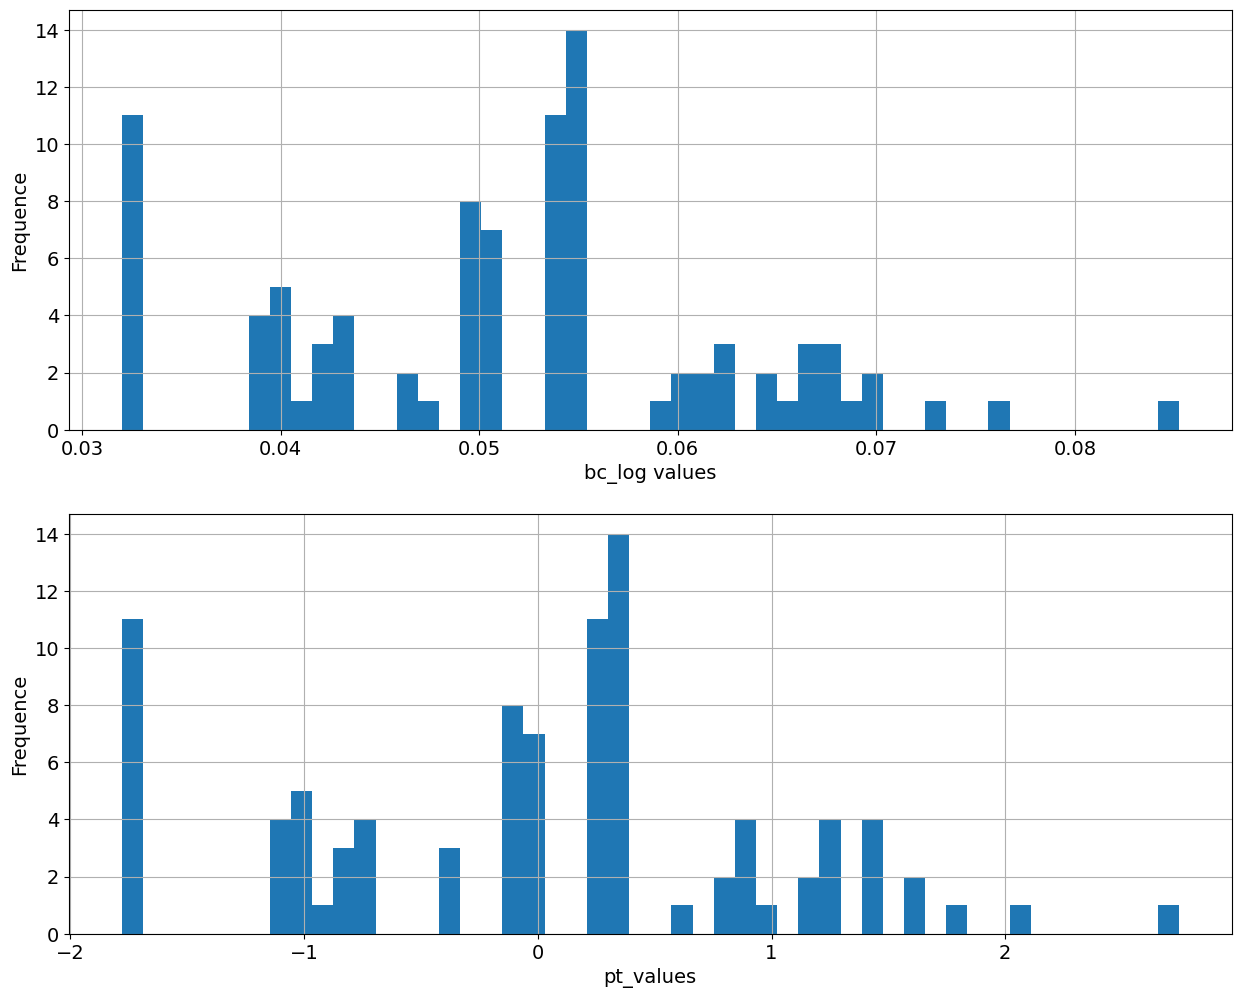

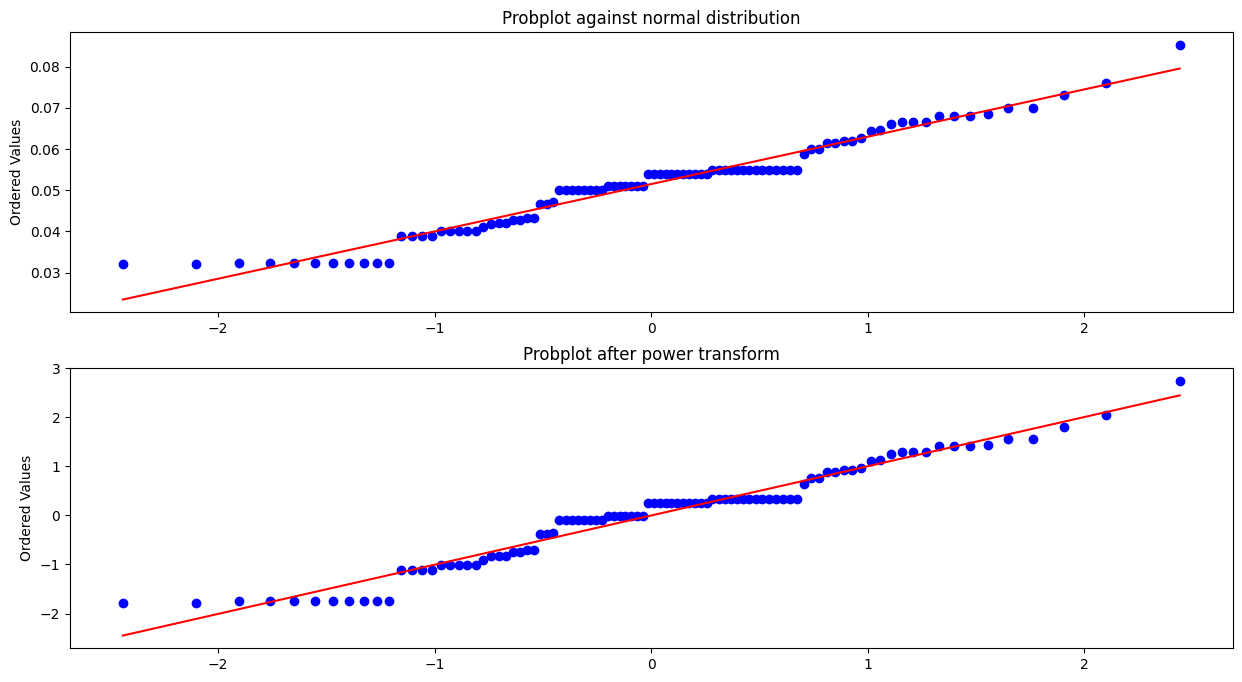

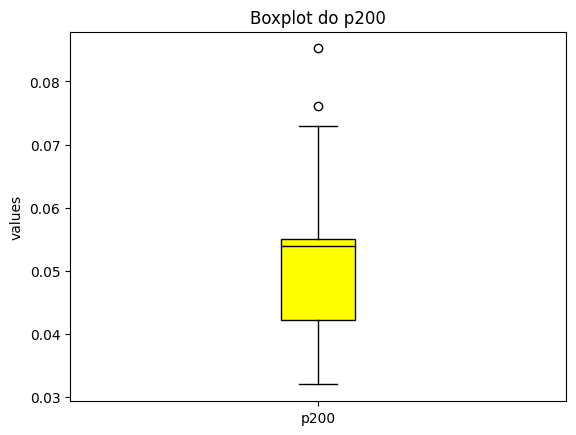

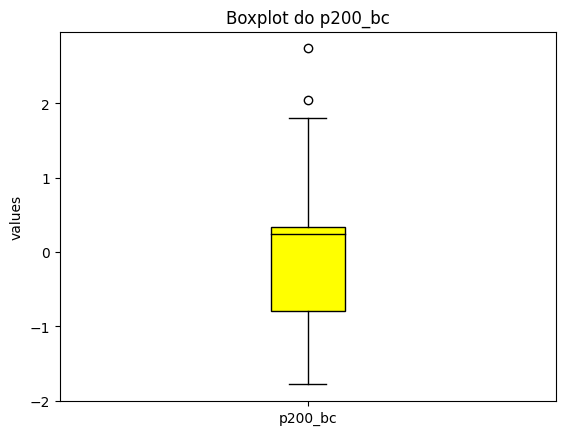

In [239]:
pt = PowerTransformer(method='box-cox')
pt.fit(pd.DataFrame(df['p200']))
df['p200_bc'] = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df['p200']))])

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 12))
df['p200'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df['p200_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('pt_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
stats.probplot(df['p200'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

stats.probplot(df['p200_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after power transform')

plt.figure()
plt.boxplot(
    df["p200"],
    labels=["p200"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p200")
plt.show()

fig = plt.figure()
plt.boxplot(
    df['p200_bc'],
    labels=["p200_bc"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p200_bc")
plt.show()

In [240]:
display(df[df['p200_bc'] > 1.9])
indices = []
indices.append(df[df['p200_bc'] > 1.9].index)
print(indices)


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe,p200_bc
36,0.085231,0.493845,0.378421,0.167271,0.050,0.163,0.70,0.000083,0.826,7570000.0,-1.470,3.07,1,2.741738
72,0.076058,0.439089,0.175869,0.000000,0.047,0.160,0.75,0.004740,0.431,11500000.0,-1.293,2.60,3,2.043103


[Int64Index([36, 72], dtype='int64')]


## p4

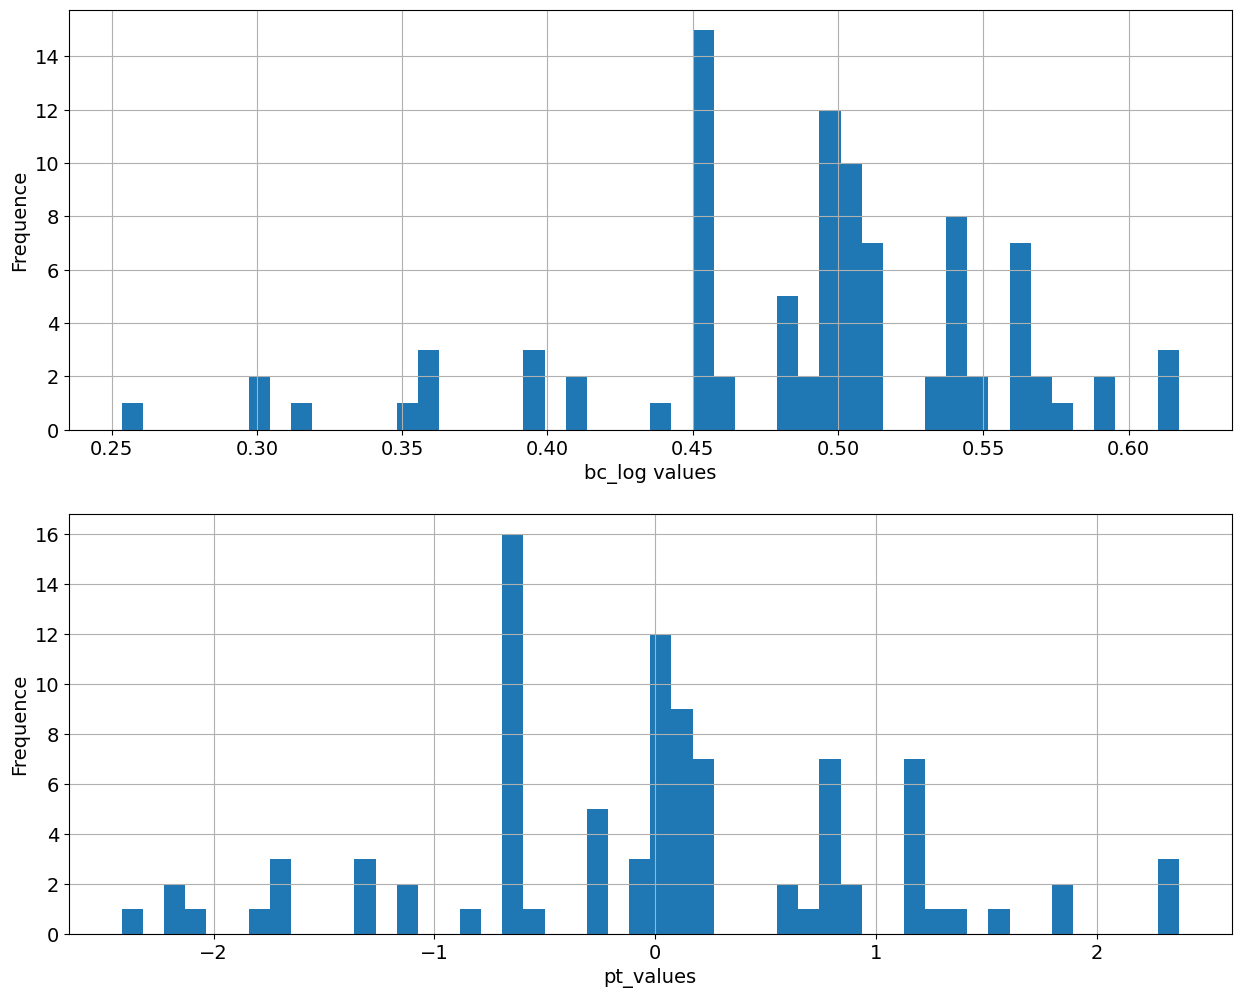

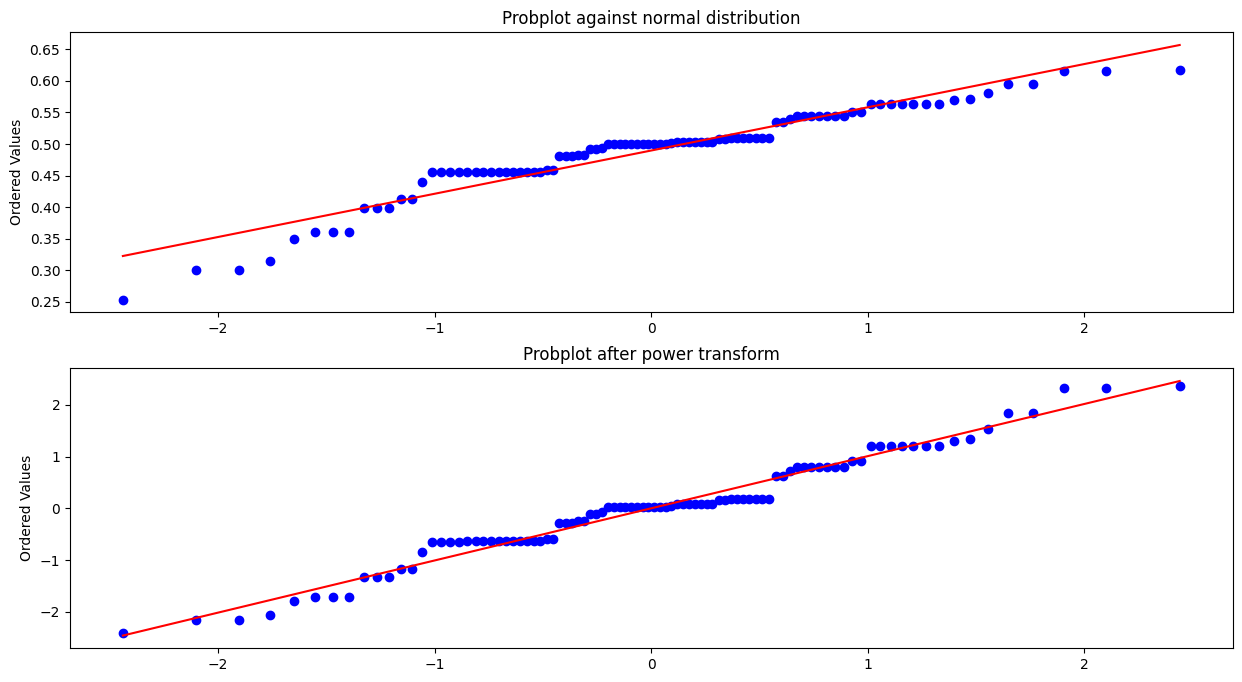

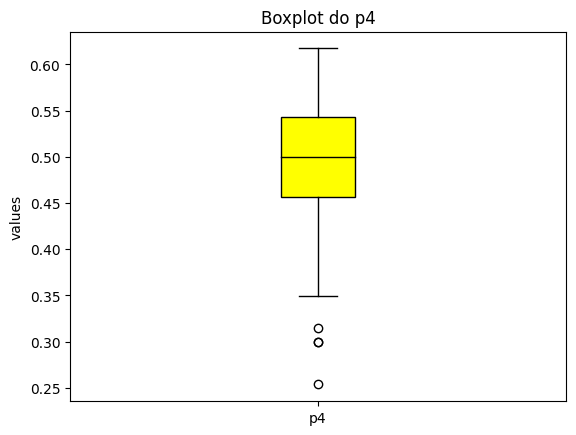

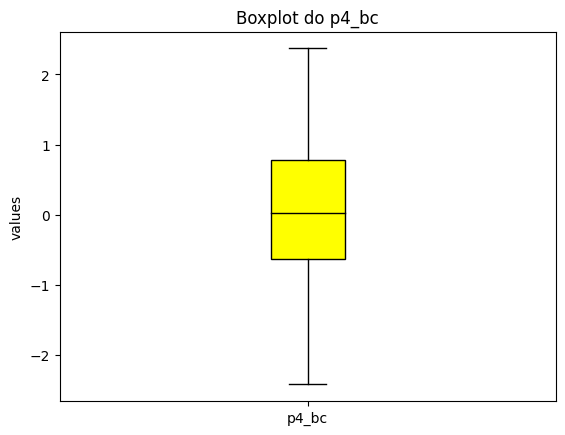

In [241]:
pt = PowerTransformer(method='box-cox')
pt.fit(pd.DataFrame(df['p4']))
df['p4_bc'] = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df['p4']))])

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 12))
df['p4'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df['p4_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('pt_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
stats.probplot(df['p4'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

stats.probplot(df['p4_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after power transform')

plt.figure()
plt.boxplot(
    df["p4"],
    labels=["p4"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p4")
plt.show()

fig = plt.figure()
plt.boxplot(
    df['p4_bc'],
    labels=["p4_bc"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p4_bc")
plt.show()

## p38

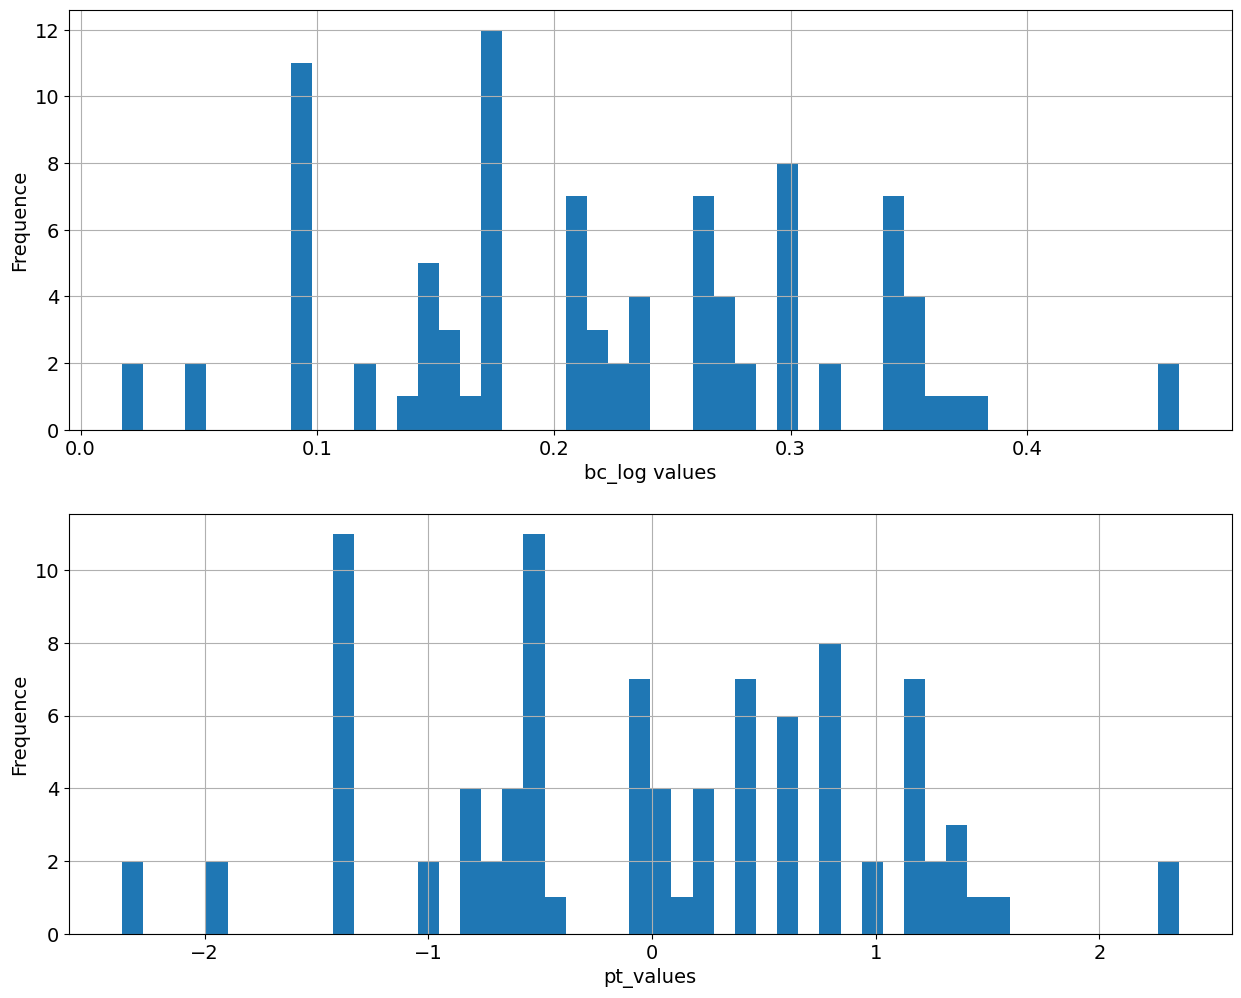

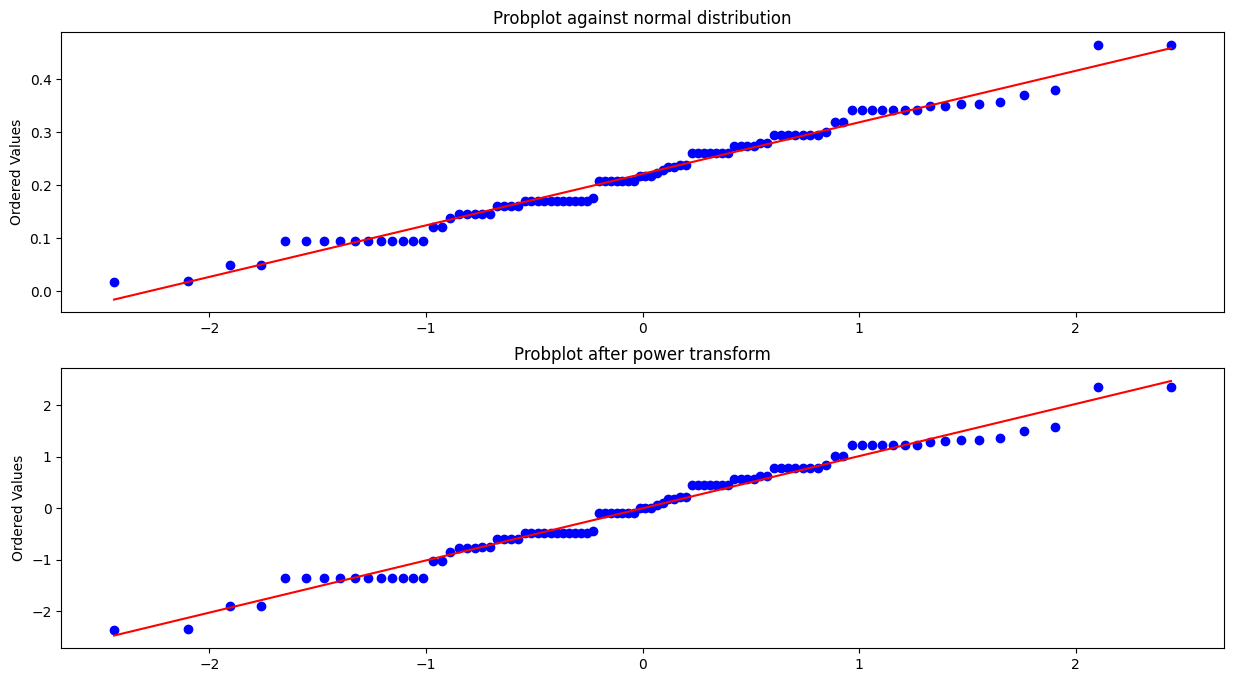

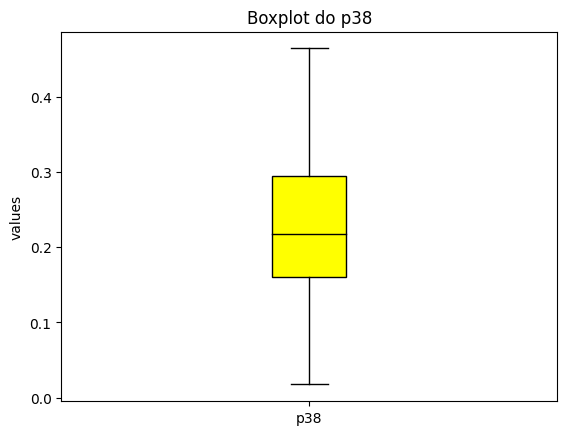

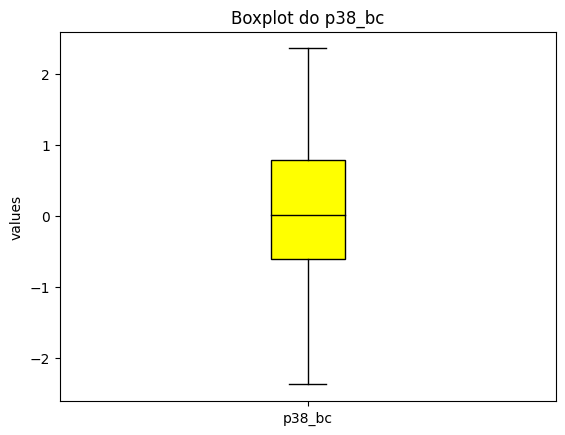

In [242]:
pt = PowerTransformer(method='box-cox')
pt.fit(pd.DataFrame(df['p38']))
df['p38_bc'] = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df['p38']))])

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 12))
df['p38'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df['p38_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('pt_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
stats.probplot(df['p38'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

stats.probplot(df['p38_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after power transform')

plt.figure()
plt.boxplot(
    df["p38"],
    labels=["p38"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p38")
plt.show()

fig = plt.figure()
plt.boxplot(
    df['p38_bc'],
    labels=["p38_bc"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p38_bc")
plt.show()

## p34

In [243]:
df['p34'] = df['p34'] + 0.001


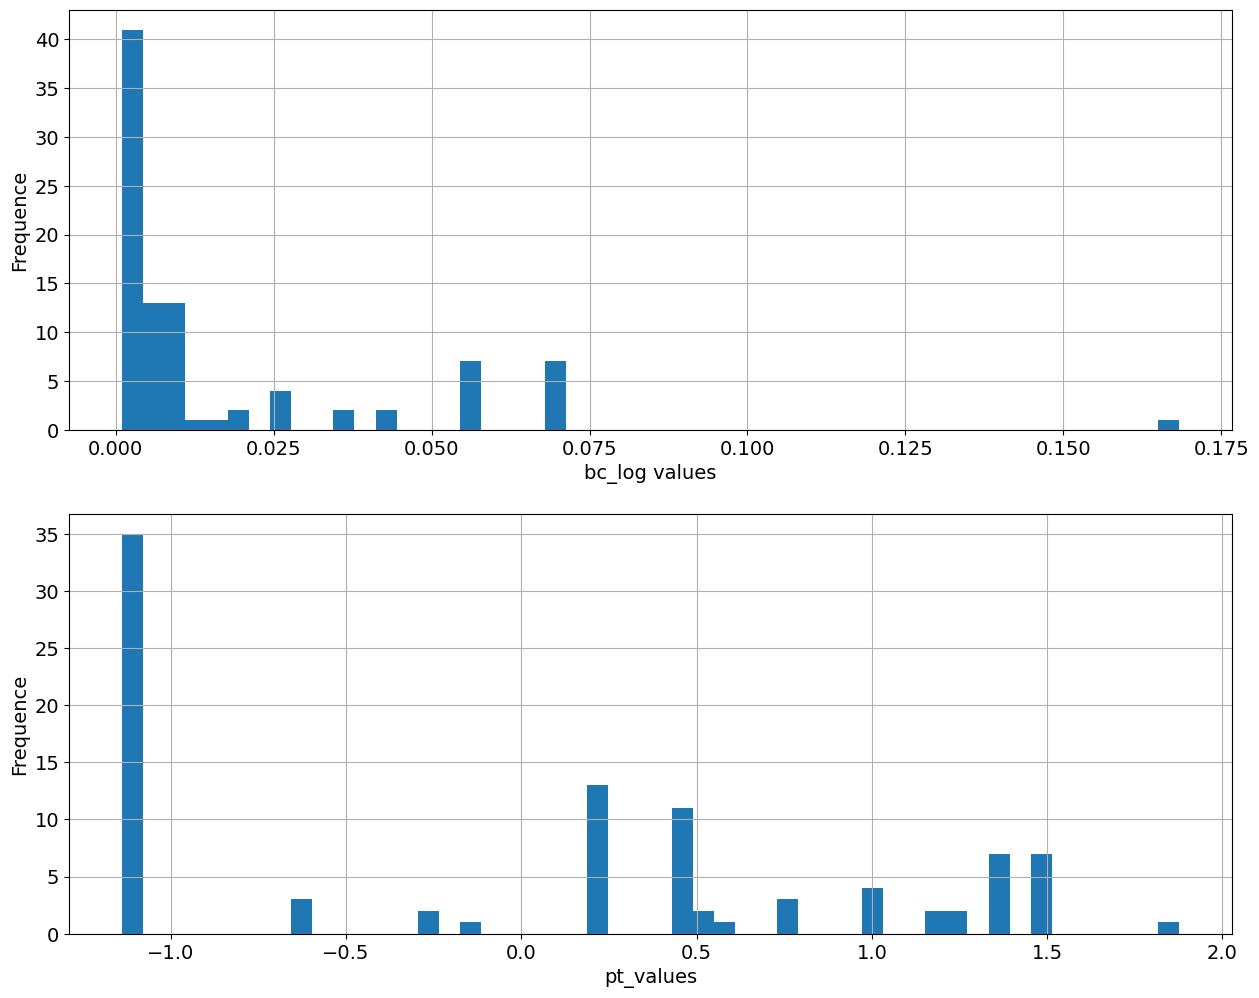

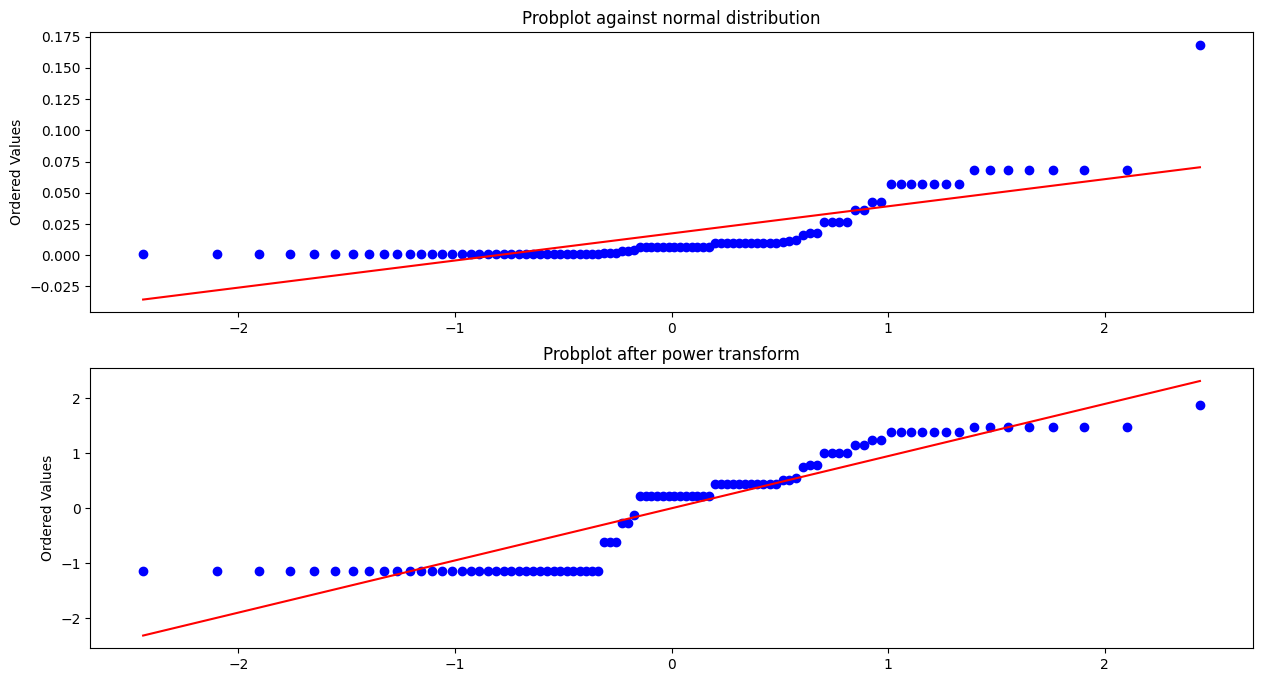

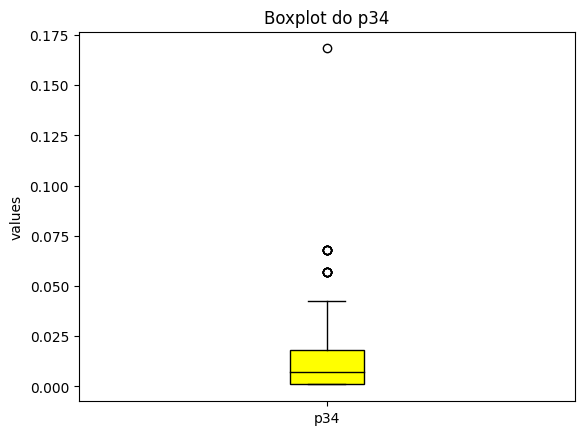

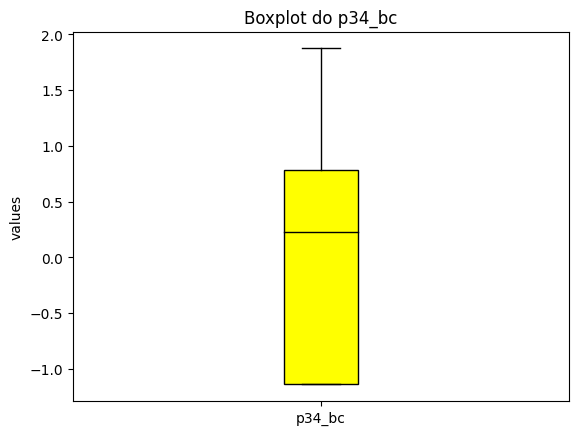

In [244]:

pt = PowerTransformer(method='box-cox')
pt.fit(pd.DataFrame(df['p34']))
df['p34_bc'] = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df['p34']))])

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 12))
df['p34'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df['p34_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('pt_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
stats.probplot(df['p34'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

stats.probplot(df['p34_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after power transform')

plt.figure()
plt.boxplot(
    df["p34"],
    labels=["p34"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p34")
plt.show()

fig = plt.figure()
plt.boxplot(
    df['p34_bc'],
    labels=["p34_bc"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p34_bc")
plt.show()

## Teor

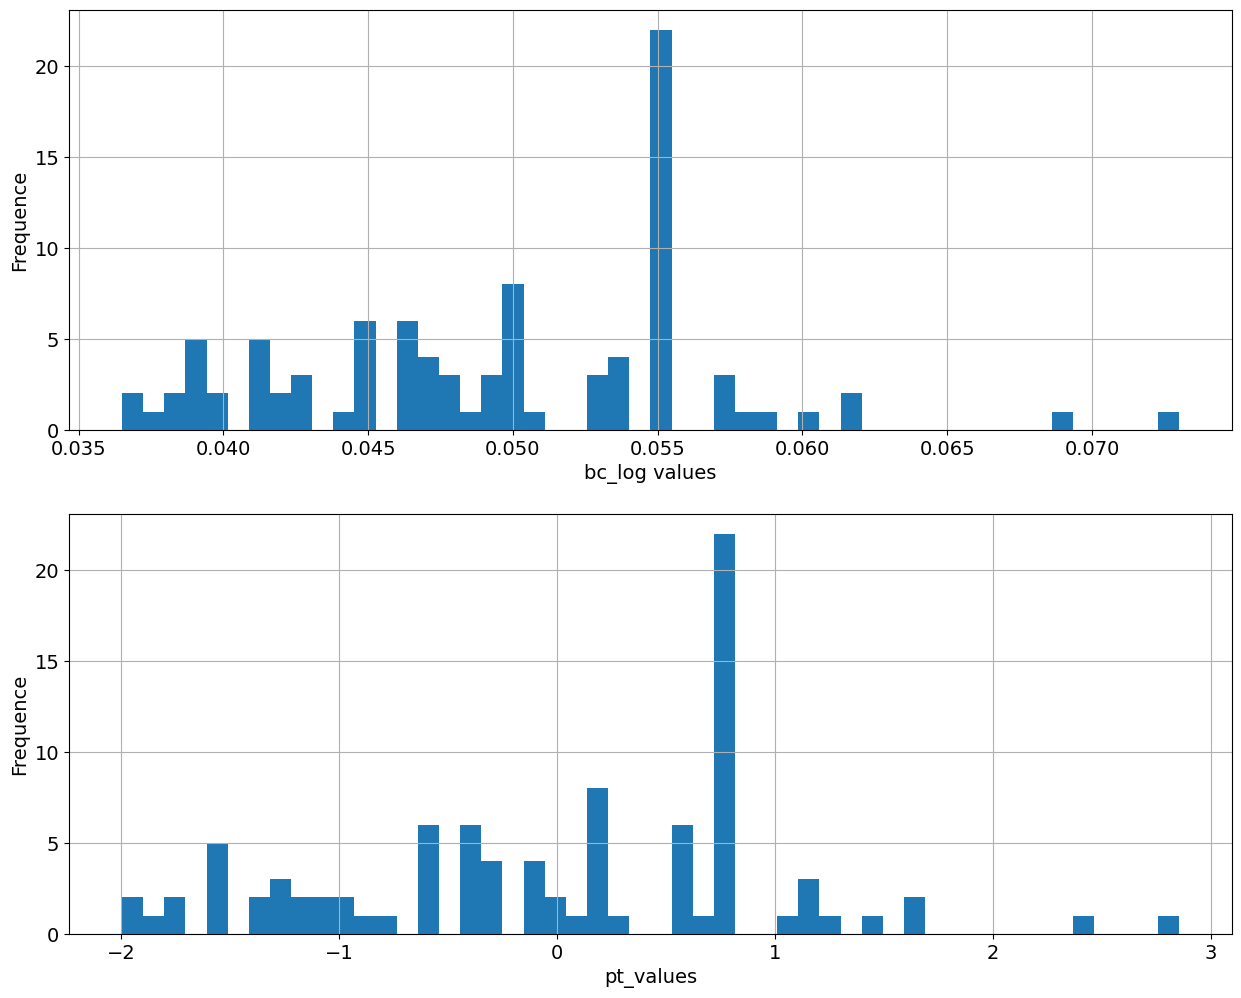

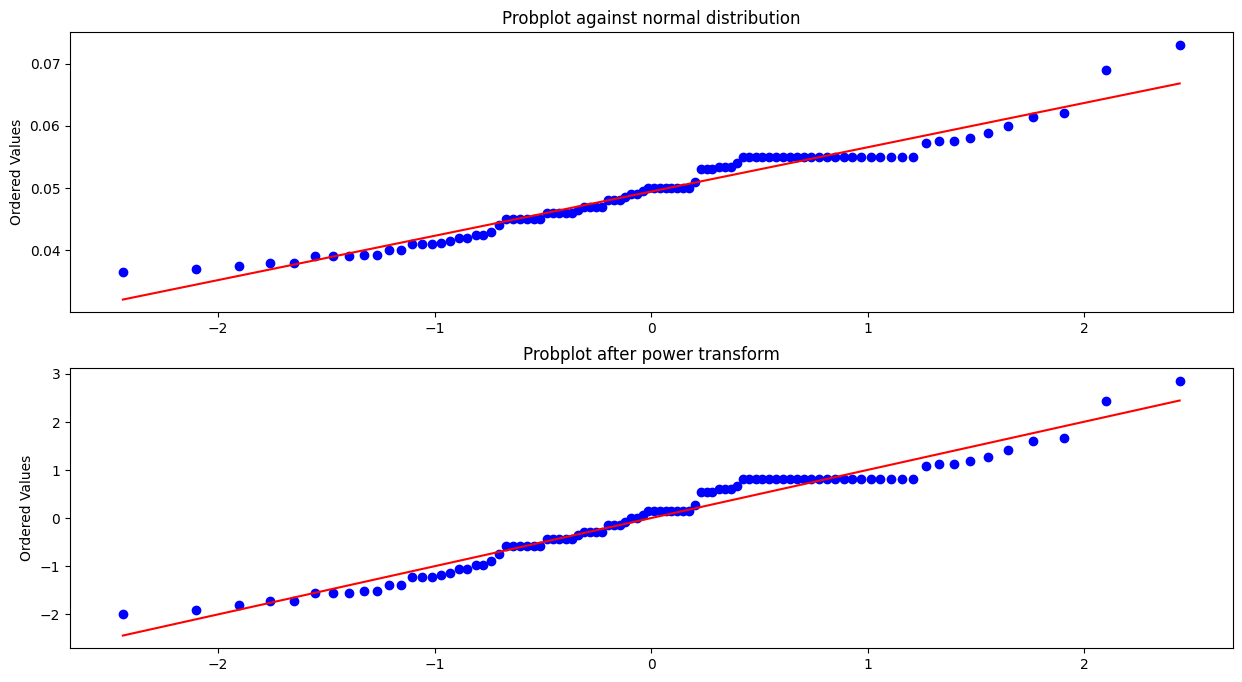

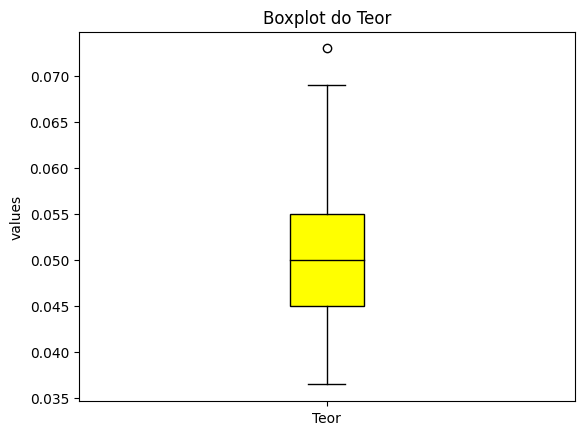

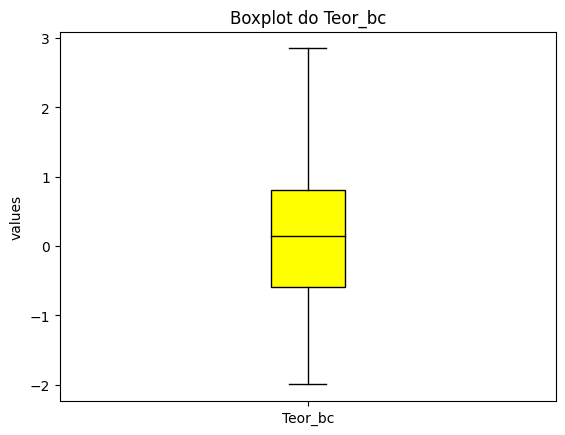

In [245]:
pt = PowerTransformer(method='box-cox')
pt.fit(pd.DataFrame(df['Teor']))
df['Teor_bc'] = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df['Teor']))])

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 12))
df['Teor'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df['Teor_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('pt_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
stats.probplot(df['Teor'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

stats.probplot(df['Teor_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after power transform')

plt.figure()
plt.boxplot(
    df["Teor"],
    labels=["Teor"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do Teor")
plt.show()

fig = plt.figure()
plt.boxplot(
    df['Teor_bc'],
    labels=["Teor_bc"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do Teor_bc")
plt.show()

## VMA

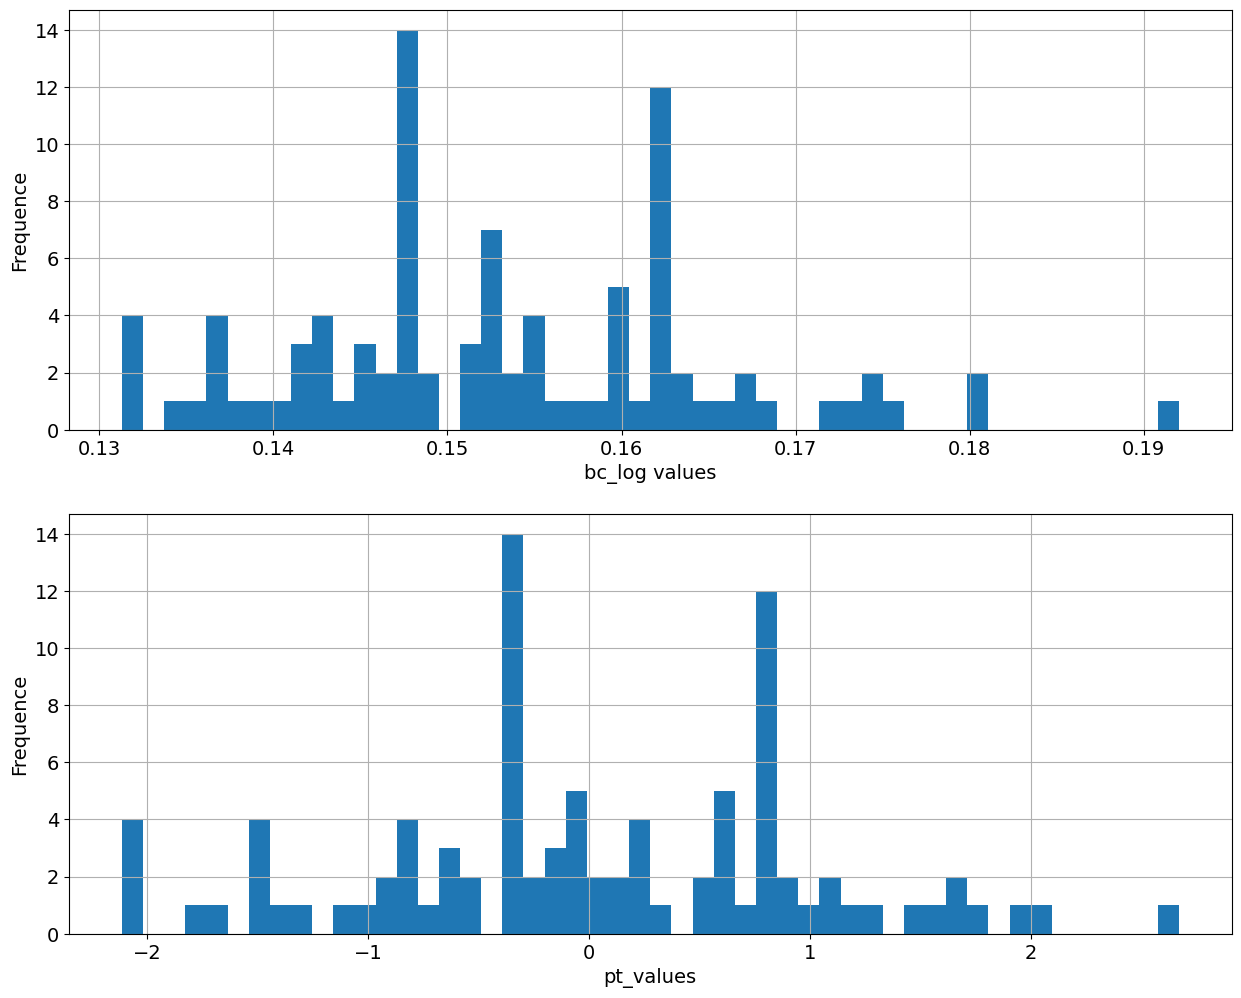

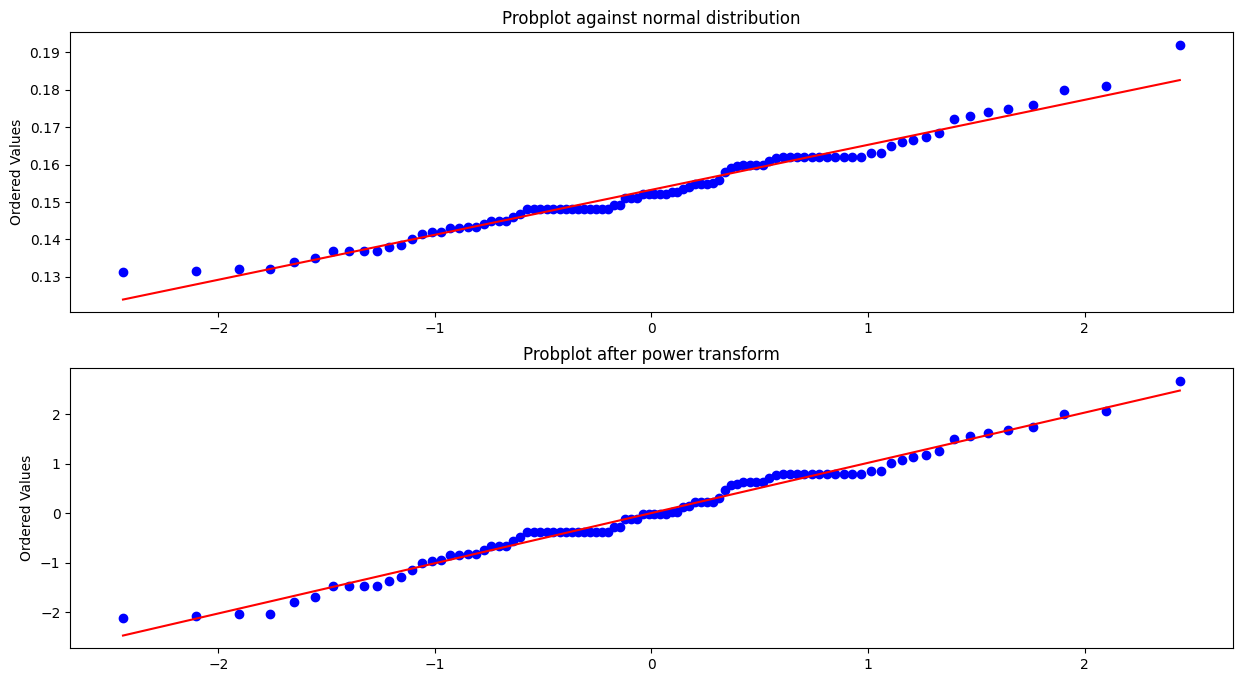

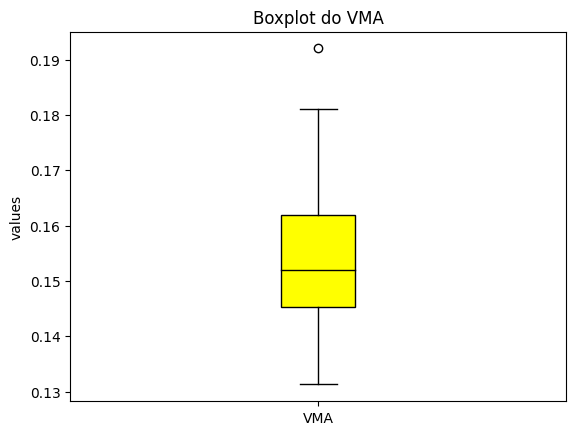

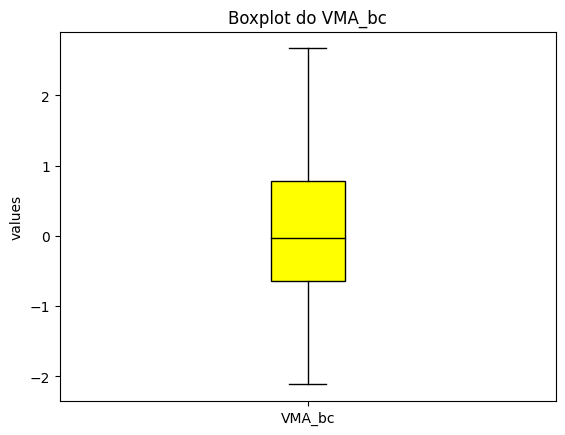

In [246]:
pt = PowerTransformer(method='box-cox')
pt.fit(pd.DataFrame(df['VMA']))
df['VMA_bc'] = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df['VMA']))])

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 12))
df['VMA'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df['VMA_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('pt_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
stats.probplot(df['VMA'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

stats.probplot(df['VMA_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after power transform')

plt.figure()
plt.boxplot(
    df["VMA"],
    labels=["VMA"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do VMA")
plt.show()

fig = plt.figure()
plt.boxplot(
    df['VMA_bc'],
    labels=["VMA_bc"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do VMA_bc")
plt.show()

## VFA

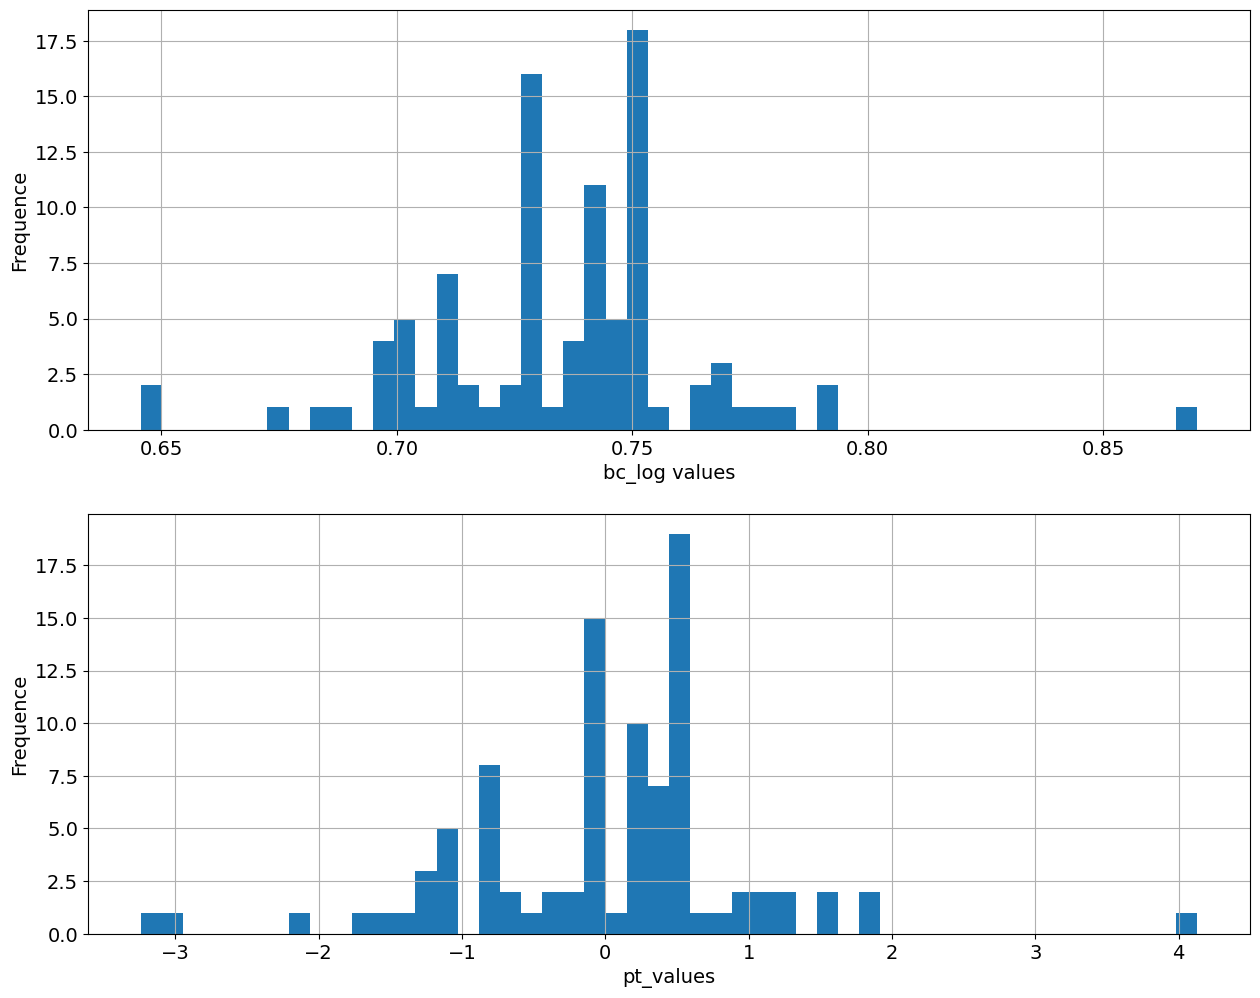

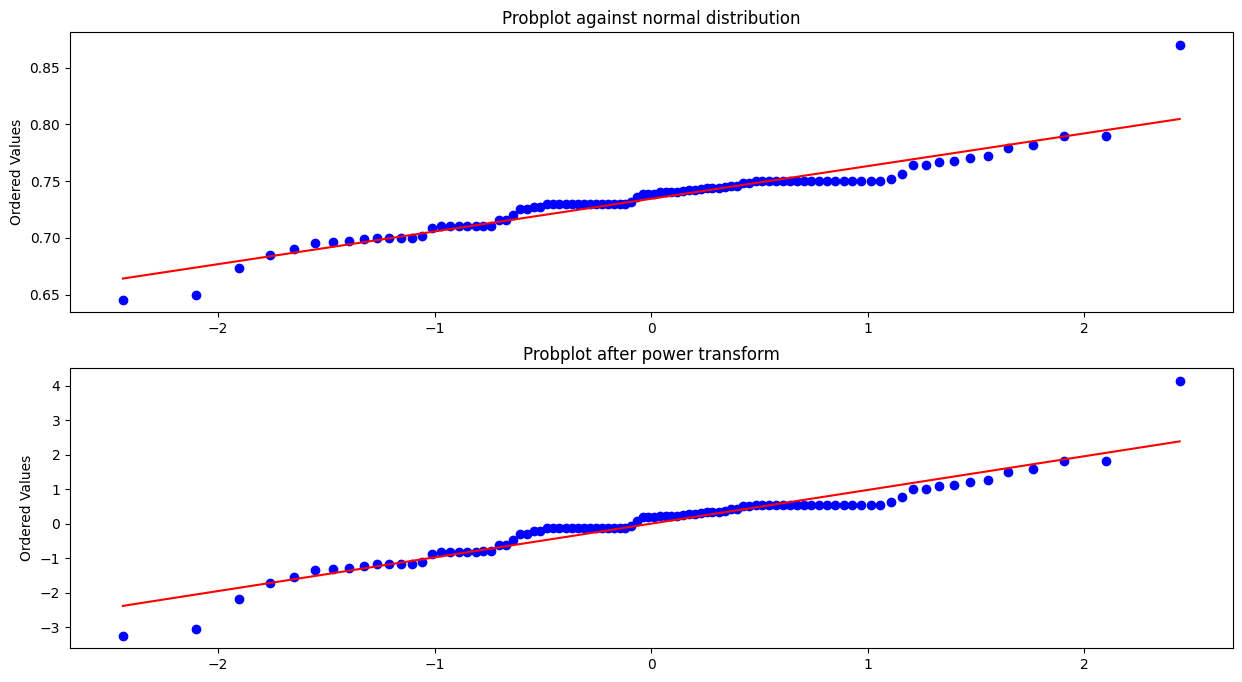

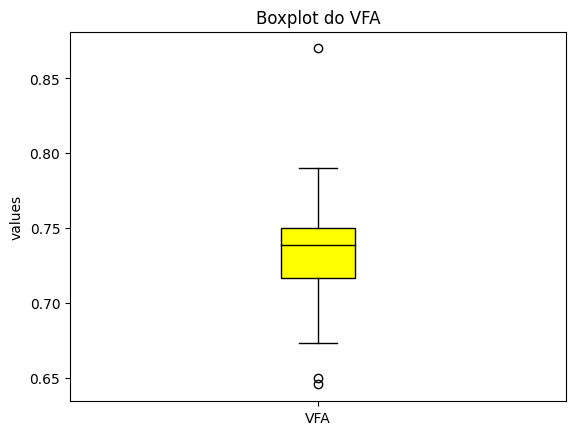

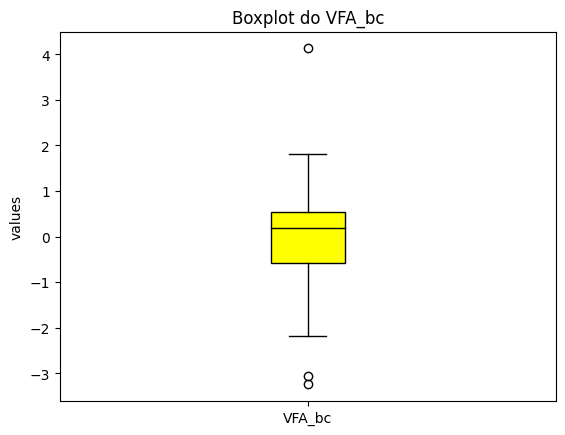

In [247]:
pt = PowerTransformer(method='box-cox')
pt.fit(pd.DataFrame(df['VFA']))
df['VFA_bc'] = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df['VFA']))])

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 12))
df['VFA'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df['VFA_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('pt_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
stats.probplot(df['VFA'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

stats.probplot(df['VFA_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after power transform')

plt.figure()
plt.boxplot(
    df["VFA"],
    labels=["VFA"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do VFA")
plt.show()

fig = plt.figure()
plt.boxplot(
    df['VFA_bc'],
    labels=["VFA_bc"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do VFA_bc")
plt.show()

# Estudos de Variáveis de Saída 

## C11

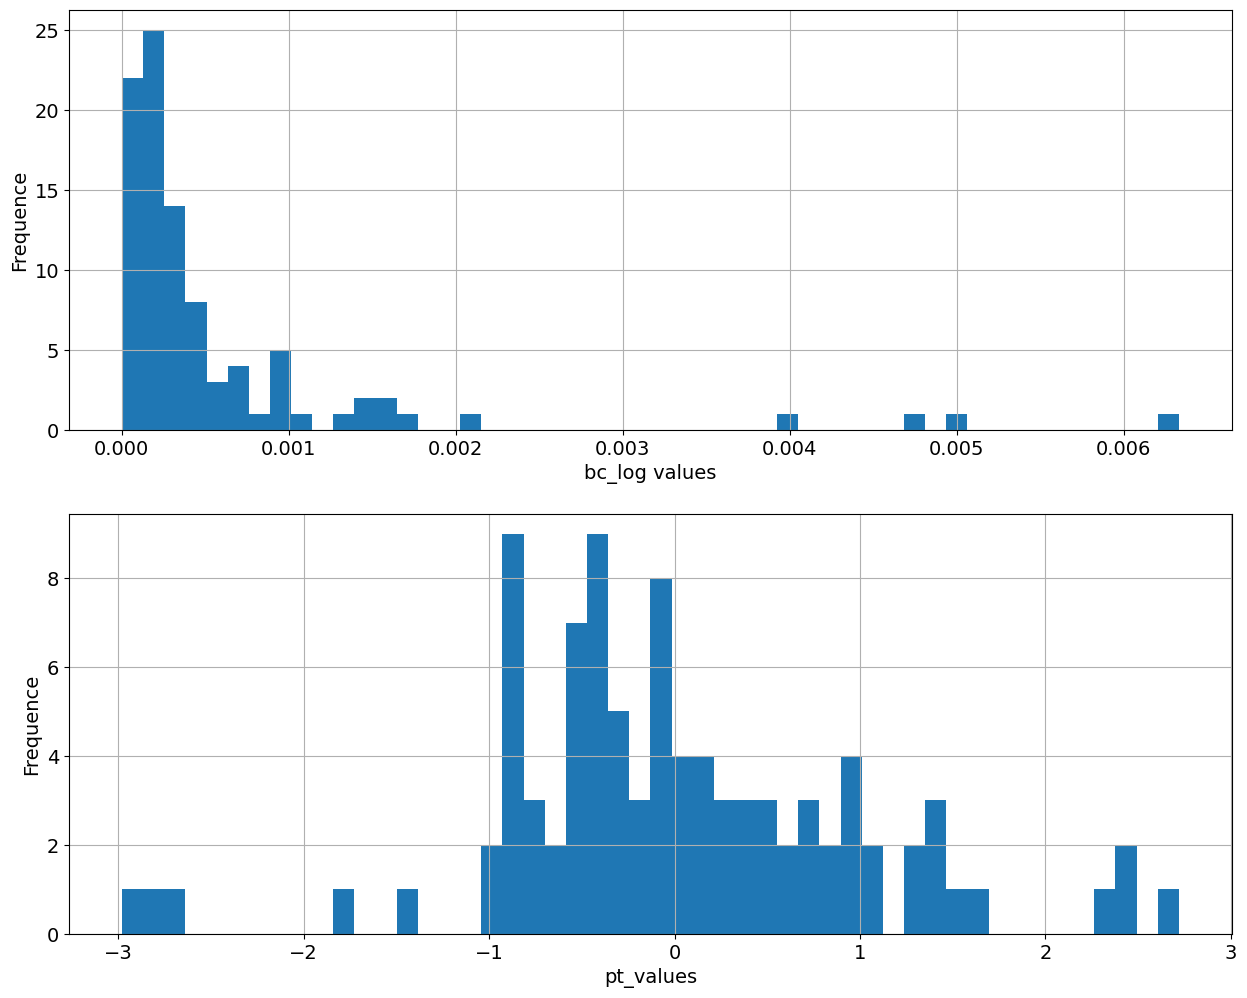

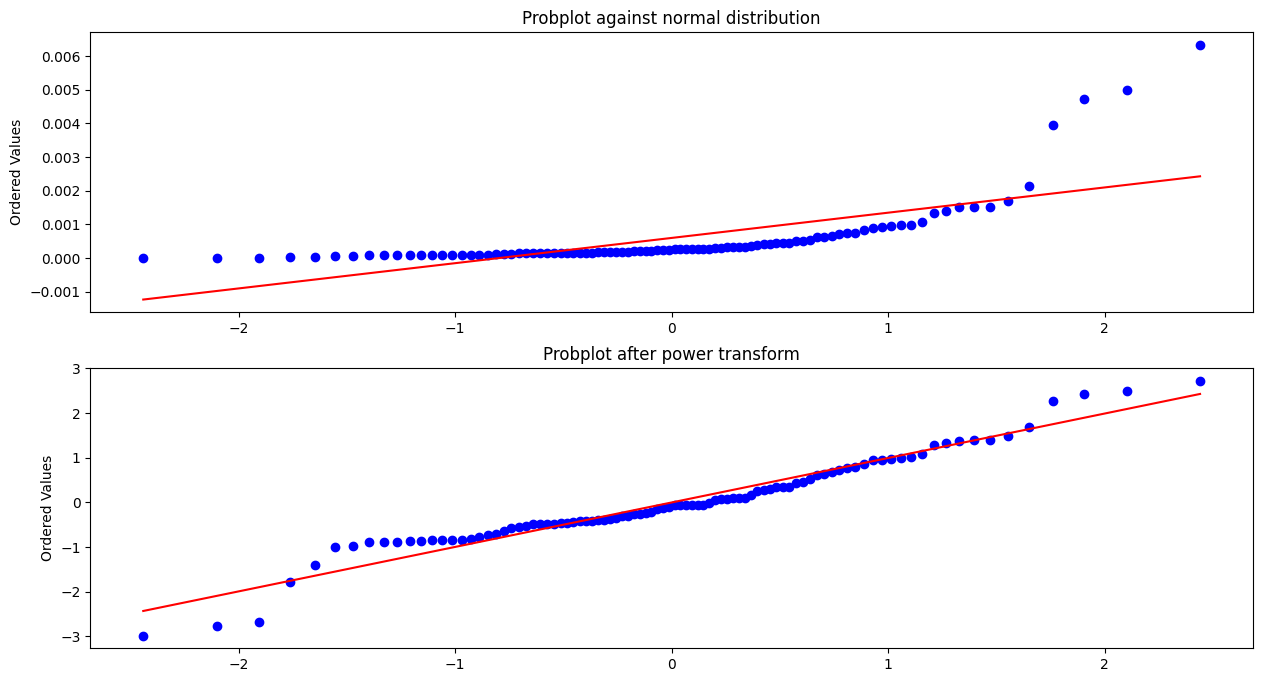

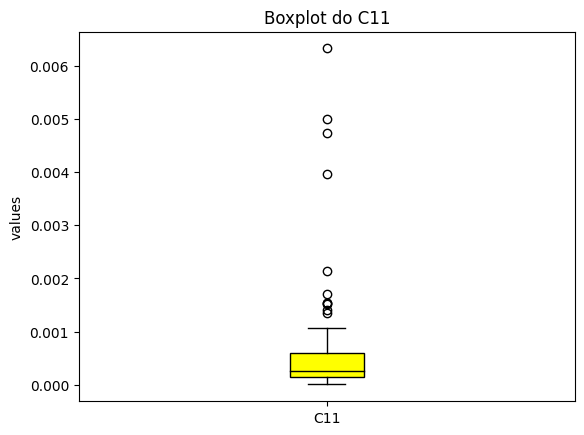

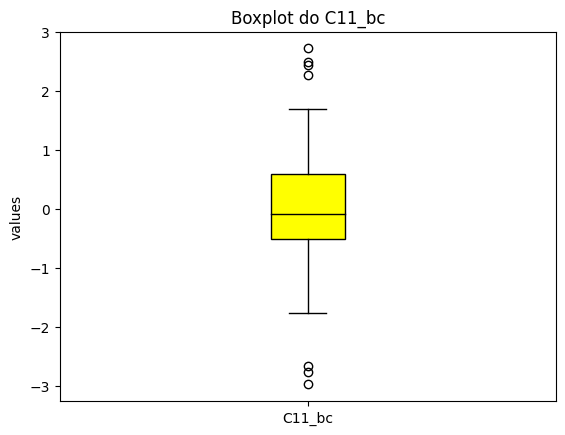

In [248]:
pt = PowerTransformer(method='box-cox')
pt.fit(pd.DataFrame(df['C11']))
df['C11_bc'] = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df['C11']))])
# a = df[(df['C11_bc'] < -1) & (df['C11_bc'] > -2)]
# a = a['C11_bc'].min()

# b = df[(df['C11_bc'] > 1) & (df['C11_bc'] < 2)]
# b = b['C11_bc'].max()

# for i in df[df['C11_bc'] <-2].index:
#     df['C11_bc'][i] = a

# for i in df[df['C11_bc']> 2].index:
#     df['C11_bc'][i] = b




fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 12))
df['C11'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df['C11_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('pt_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
stats.probplot(df['C11'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

stats.probplot(df['C11_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after power transform')

plt.figure()
plt.boxplot(
    df["C11"],
    labels=["C11"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do C11")
plt.show()

fig = plt.figure()
plt.boxplot(
    df['C11_bc'],
    labels=["C11_bc"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do C11_bc")
plt.show()

## C12

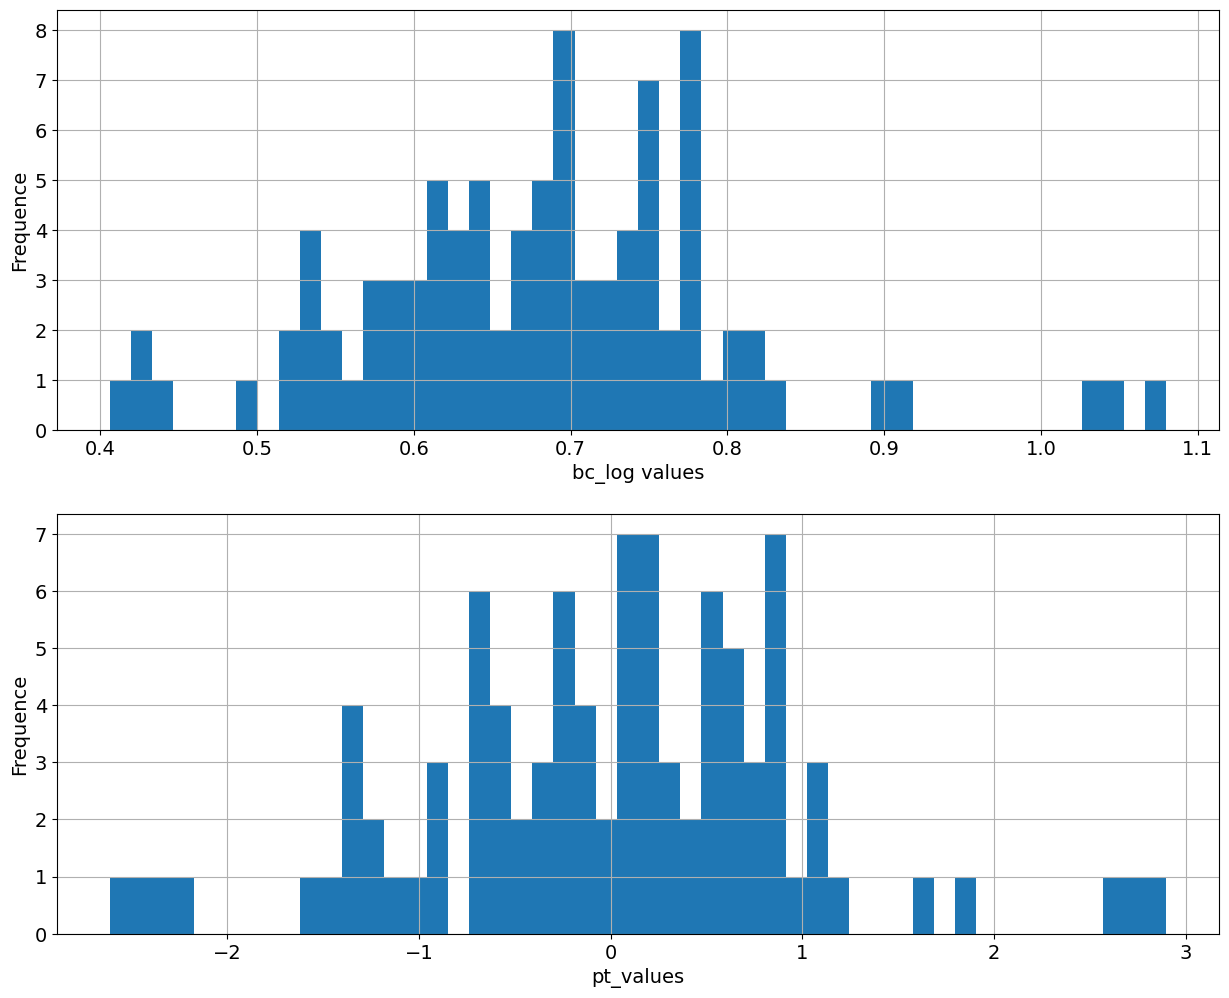

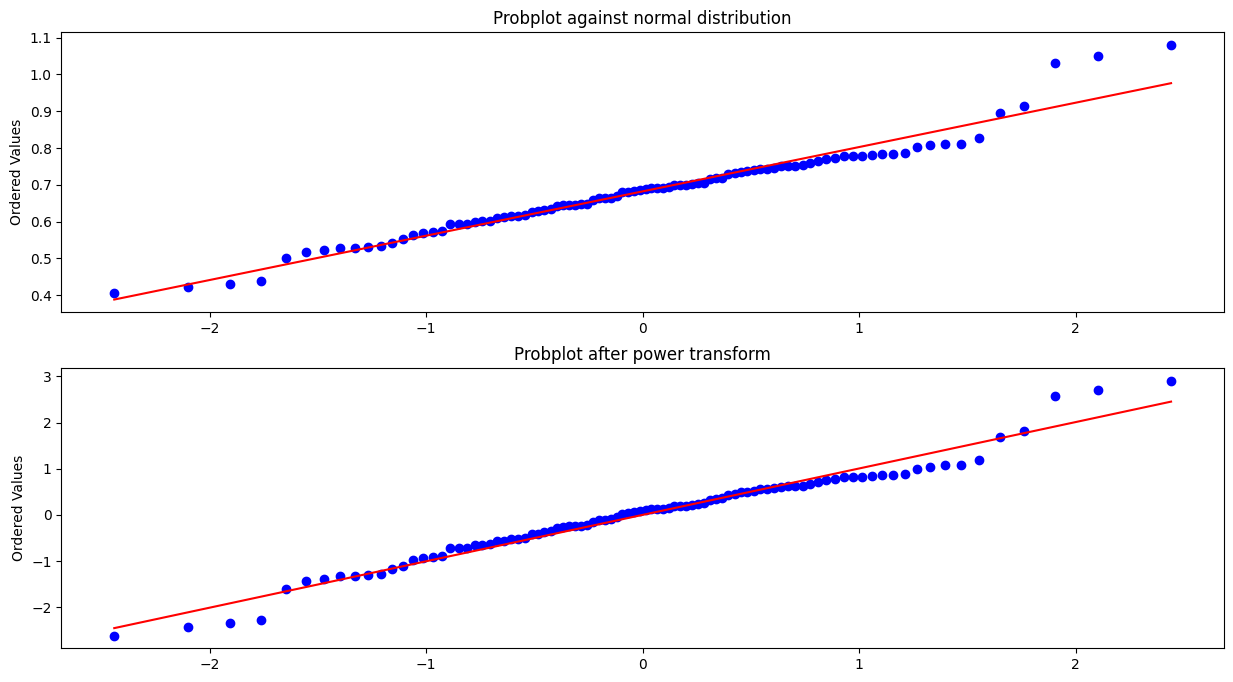

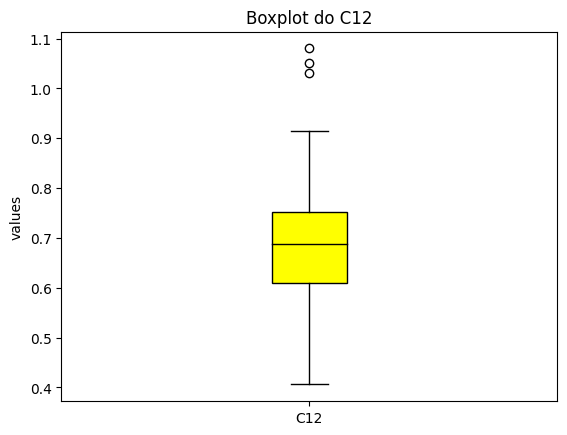

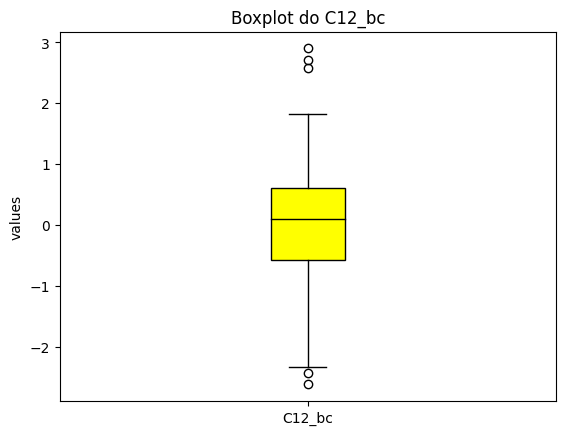

In [249]:
pt = PowerTransformer(method='box-cox')
pt.fit(pd.DataFrame(df['C12']))
df['C12_bc'] = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df['C12']))])

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 12))
df['C12'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df['C12_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('pt_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
stats.probplot(df['C12'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

stats.probplot(df['C12_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after power transform')

plt.figure()
plt.boxplot(
    df["C12"],
    labels=["C12"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do C12")
plt.show()

fig = plt.figure()
plt.boxplot(
    df['C12_bc'],
    labels=["C12_bc"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do C12_bc")
plt.show()

In [250]:
display(df[df['C12_bc'] < -2.4])
display(df[df['C12_bc'] > 2])

,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,...,Classe,p200_bc,p4_bc,p38_bc,p34_bc,Teor_bc,VMA_bc,VFA_bc,C11_bc,C12_bc
33,0.0644,0.25352,0.01876,0.001,0.0730,0.174000,0.870000,0.00500,0.422,13600000.0,...,3,1.117778,-2.416018,-2.349899,-1.139324,2.852745,1.620482,4.131842,2.488107,-2.432804
85,0.0400,0.36000,0.16000,0.001,0.0534,0.154846,0.743534,0.00633,0.406,104000000.0,...,2,-1.004179,-1.706422,-0.602733,-1.139324,0.598176,0.216632,0.331078,2.719492,-2.614114


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,...,Classe,p200_bc,p4_bc,p38_bc,p34_bc,Teor_bc,VMA_bc,VFA_bc,C11_bc,C12_bc
53,0.0540,0.5000,0.171,0.007,0.0550,0.162,0.7498,0.000002,1.03,3000000.0,...,3,0.249230,0.028474,-0.484113,0.231158,0.806177,0.782459,0.538691,-2.979941,2.582914
61,0.0680,0.3990,0.145,0.002,0.0490,0.151,0.7460,0.000004,1.08,5770000.0,...,1,1.408473,-1.324702,-0.766851,-0.613445,-0.001986,-0.111202,0.413057,-2.676187,2.899719
73,0.0587,0.3148,0.138,0.004,0.0615,0.175,0.7500,0.000004,1.05,34100000.0,...,2,0.647393,-2.062943,-0.844454,-0.130223,1.602335,1.684792,0.545280,-2.767456,2.710759


## Gamma

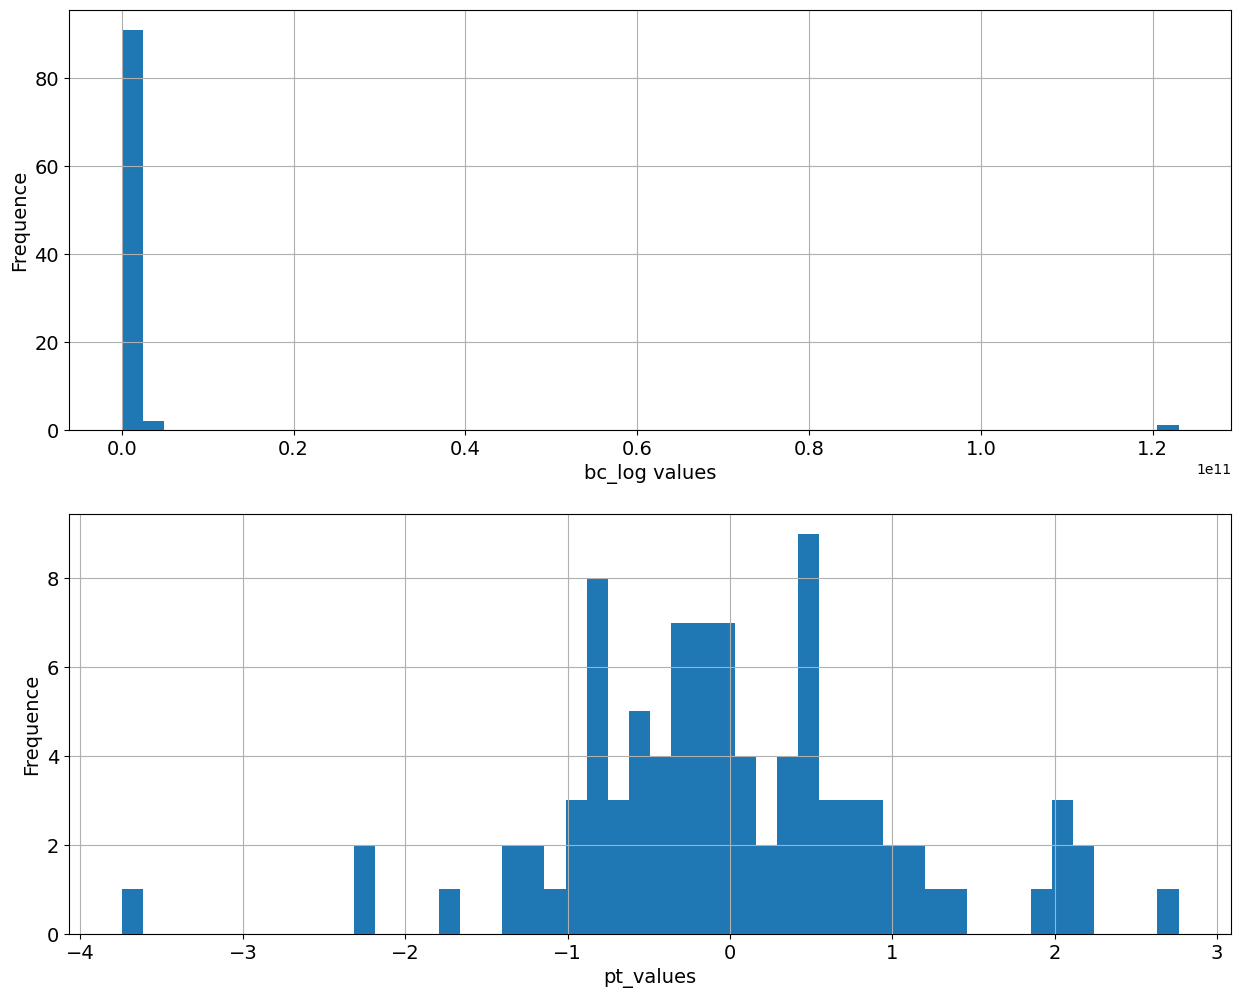

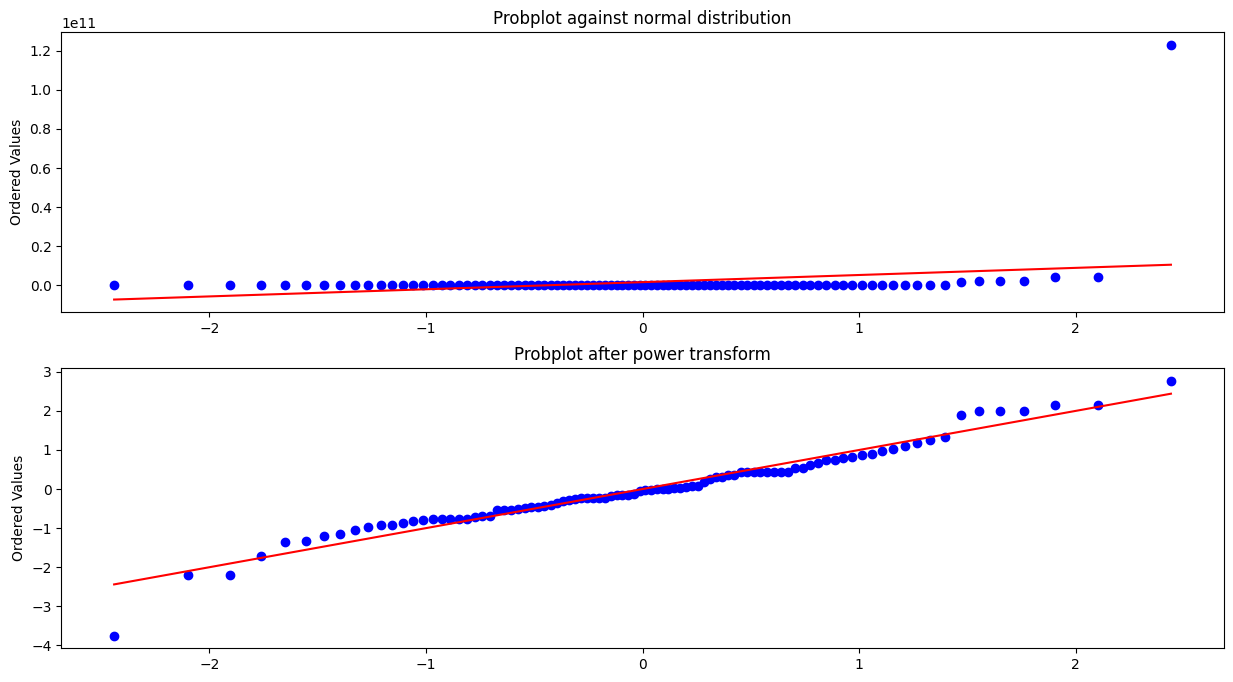

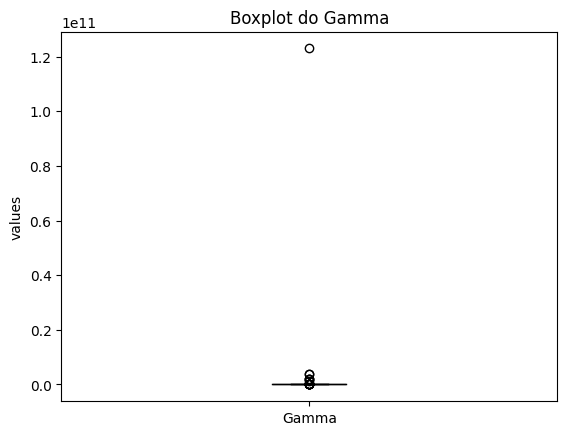

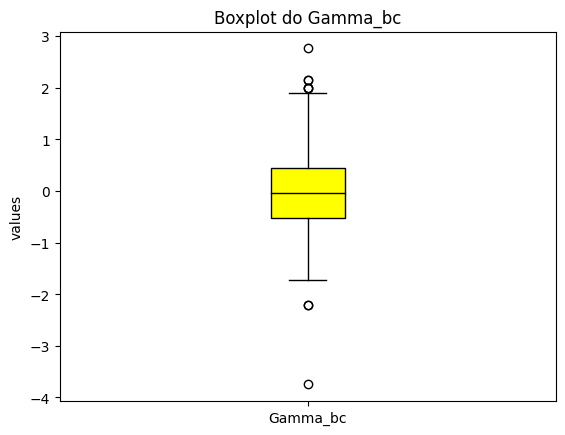

In [251]:
pt = PowerTransformer(method='box-cox')
pt.fit(pd.DataFrame(df['Gamma']))
df['Gamma_bc'] = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df['Gamma']))])

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 12))
df['Gamma'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df['Gamma_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('pt_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
stats.probplot(df['Gamma'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

stats.probplot(df['Gamma_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after power transform')

plt.figure()
plt.boxplot(
    df["Gamma"],
    labels=["Gamma"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do Gamma")
plt.show()

fig = plt.figure()
plt.boxplot(
    df['Gamma_bc'],
    labels=["Gamma_bc"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do Gamma_bc")
plt.show()

## Delta

In [252]:
df['Delta'] = df['Delta'] + 2.442
df['Delta'].min()

0.10000000000000009

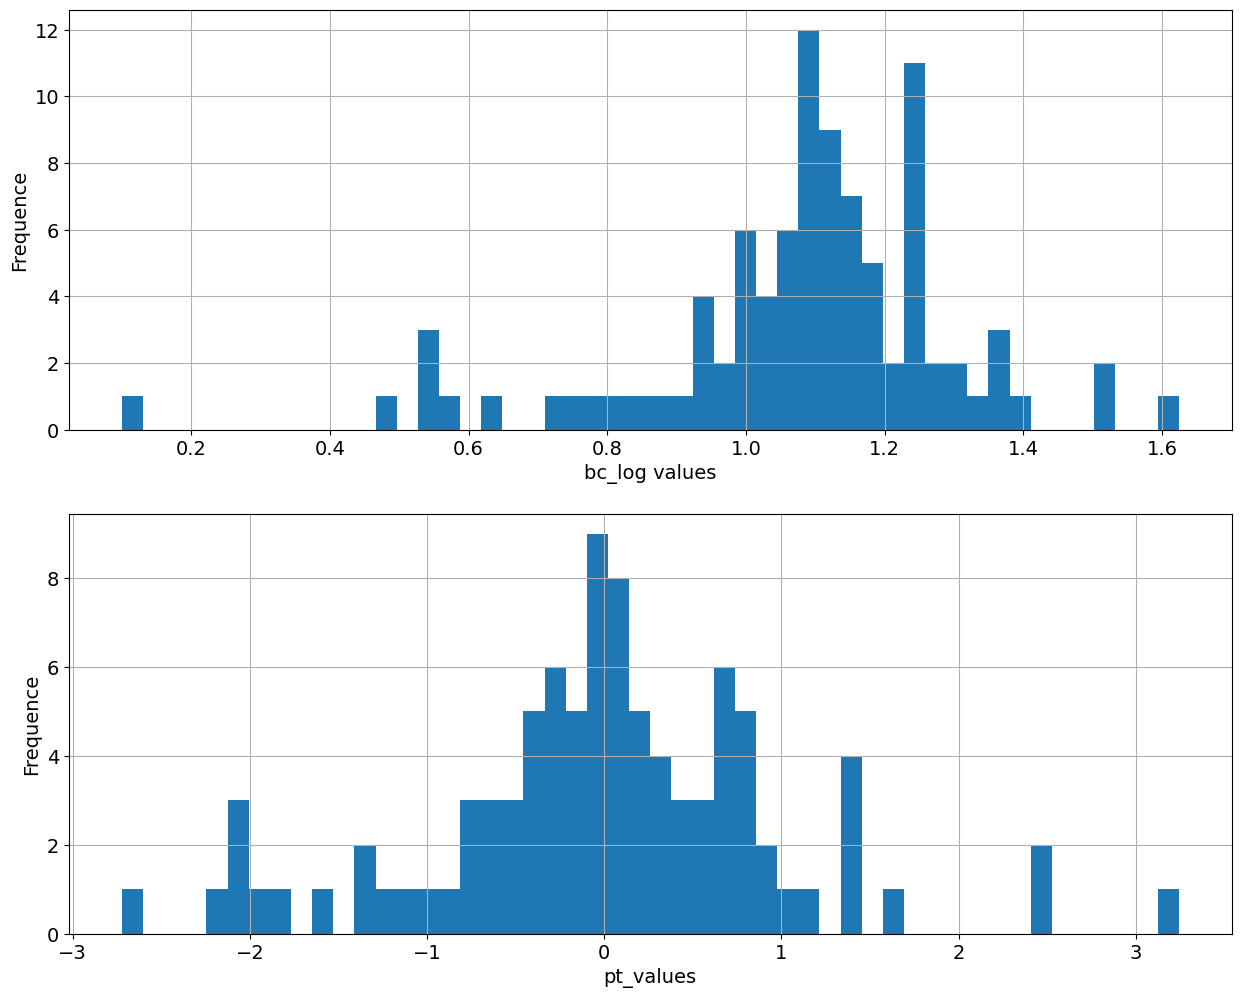

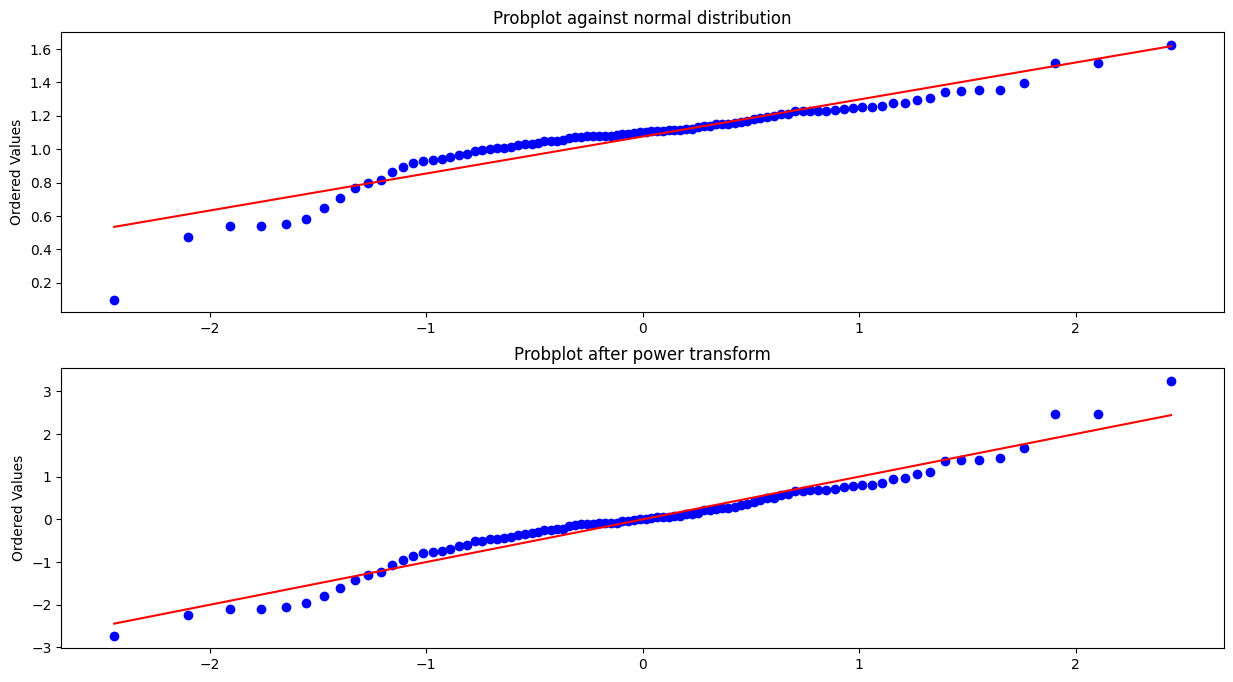

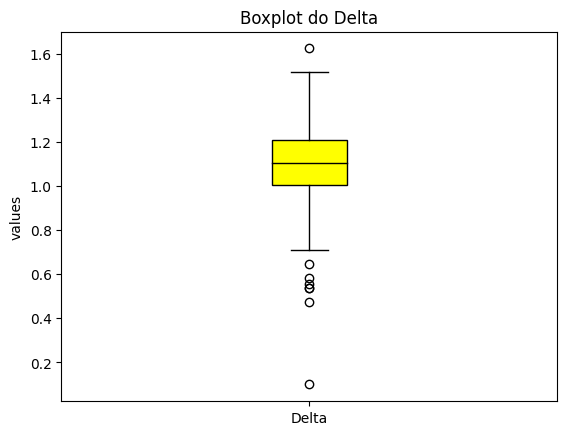

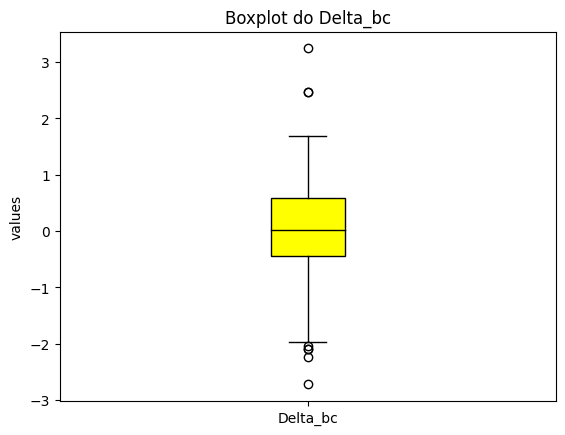

In [253]:
pt = PowerTransformer(method='box-cox')
pt.fit(pd.DataFrame(df['Delta']))
df['Delta_bc'] = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df['Delta']))])

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 12))
df['Delta'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df['Delta_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('pt_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
stats.probplot(df['Delta'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

stats.probplot(df['Delta_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after power transform')

plt.figure()
plt.boxplot(
    df["Delta"],
    labels=["Delta"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do Delta")
plt.show()

fig = plt.figure()
plt.boxplot(
    df['Delta_bc'],
    labels=["Delta_bc"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do Delta_bc")
plt.show()

## Alpha

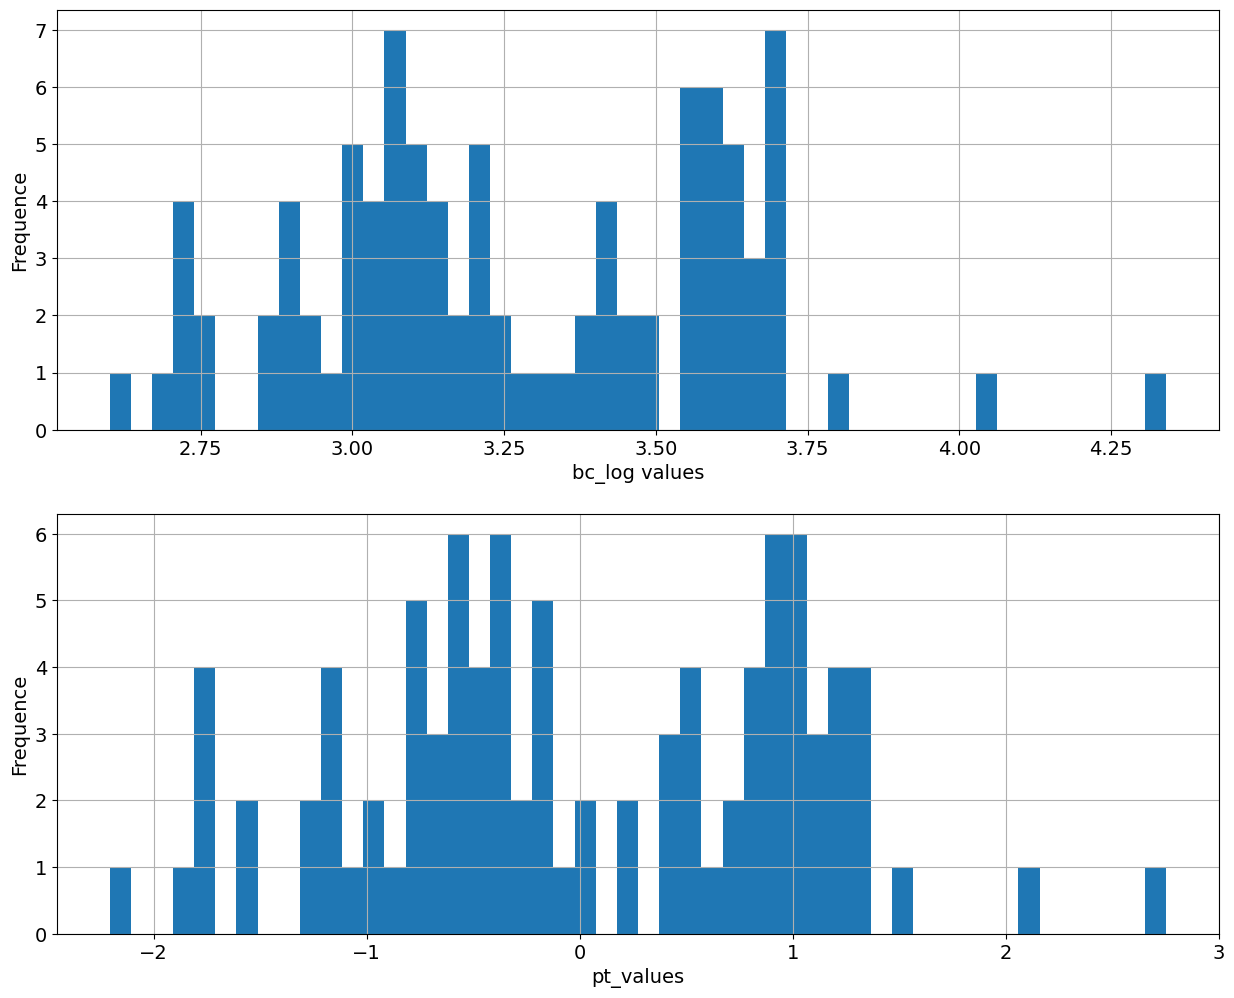

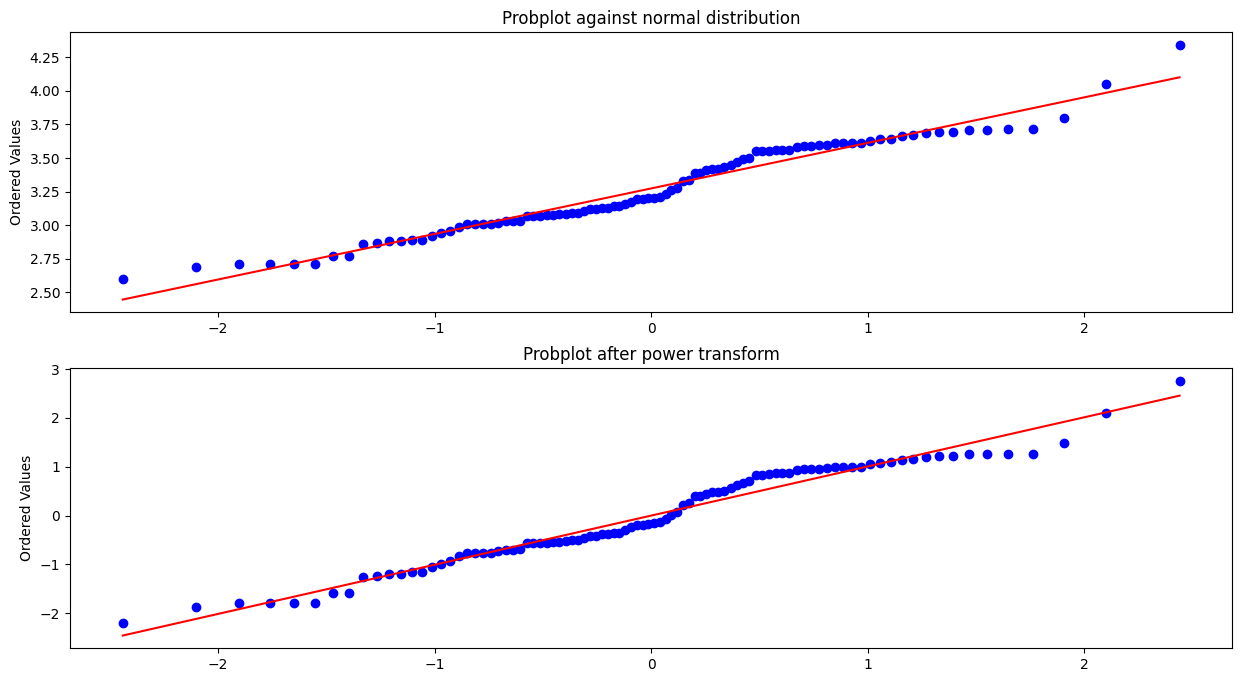

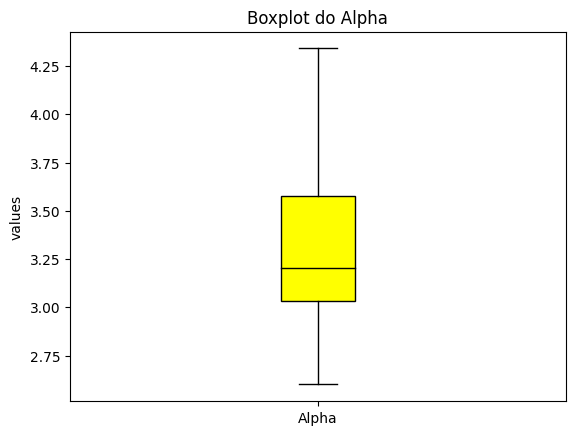

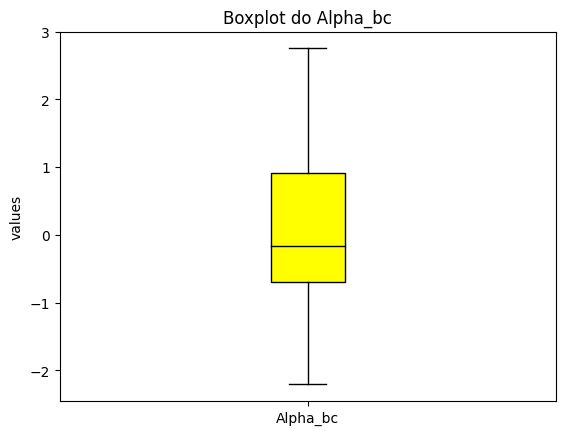

In [254]:
pt = PowerTransformer(method='box-cox')
pt.fit(pd.DataFrame(df['Alpha']))
df['Alpha_bc'] = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df['Alpha']))])

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 12))
df['Alpha'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df['Alpha_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('pt_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
stats.probplot(df['Alpha'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

stats.probplot(df['Alpha_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after power transform')

plt.figure()
plt.boxplot(
    df["Alpha"],
    labels=["Alpha"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do Alpha")
plt.show()

plt.figure()
plt.boxplot(
    df['Alpha_bc'],
    labels=["Alpha_bc"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do Alpha_bc")
plt.show()

# Correlação

In [255]:
df2 = df.drop(columns=['p200','p4', 'p38', 'p34', 'Teor', 'VMA', 'VFA', 'C11', 'C12', 'Gamma', 'Delta', 'Alpha',])
display(df2)

,Classe,p200_bc,p4_bc,p38_bc,p34_bc,Teor_bc,VMA_bc,VFA_bc,C11_bc,C12_bc,Gamma_bc,Delta_bc,Alpha_bc
0,1,-0.010305,0.802465,0.443186,1.385664,-1.904768,-1.155491,-0.819979,-0.314278,0.211040,0.443999,-0.110212,-0.505210
1,1,-0.097818,1.194824,1.219804,1.469993,-1.994731,-1.690405,-1.176979,-0.698163,0.618549,1.991665,-2.237045,-0.552739
2,1,0.334781,0.077474,-0.094436,-1.139324,-1.385397,-0.379593,-0.296554,-0.629550,0.555787,-0.241017,0.338294,-0.158200
3,1,0.334781,0.177100,0.777754,-1.139324,-1.385397,-0.379593,0.212985,-0.385405,0.500525,0.741819,-0.768034,-0.127872
4,1,-0.010305,0.802465,0.443186,1.385664,-1.554787,-0.952764,-0.125197,-0.116343,-0.096284,1.335786,-1.409189,1.093640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,1,0.921295,-0.239116,0.621210,-1.139324,1.280601,2.058095,1.492748,1.283512,-1.298556,0.787945,-0.450929,-0.070537
90,1,0.334781,0.177100,0.777754,-1.139324,-1.520621,-0.853669,-0.125197,-0.483056,0.202868,0.443999,0.119833,1.268220
91,3,-0.010305,0.802465,0.443186,1.385664,-1.554787,-0.279845,-0.626402,-0.067596,-0.104736,-2.205909,2.471490,0.869678
92,1,-0.097818,1.194824,1.219804,1.469993,-1.727851,-0.824228,-0.791701,-0.055847,0.120749,2.152759,-2.090301,1.224256


<AxesSubplot: >

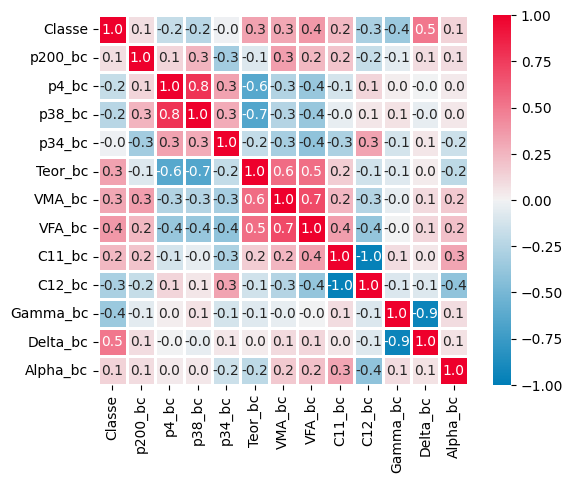

In [256]:

cmap = sns.diverging_palette(
    h_neg=240,
    h_pos=10,
    s=100,
    as_cmap=True,
)

plot = sns.heatmap(df2.corr(), fmt=".1f", cmap=cmap,
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths= 2,
    annot=True,)
display(plot)

# Seleção de Atributos

In [ ]:

# Carregar o conjunto de dados
boston = load_boston()
X = boston.data
y = boston.target

# Aplicar a seleção de atributos univariada
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Obter os índices dos atributos selecionados
selected_indices = selector.get_support(indices=True)

# Imprimir os nomes dos atributos selecionados
selected_features = [boston.feature_names[i] for i in selected_indices]
print("Atributos selecionados:", selected_features)
